In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols      # For n-way ANOVA
from statsmodels.stats.anova import _get_covariance,anova_lm # For n-way ANOVA
%matplotlib inline

import scipy.stats as stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

import warnings
warnings.filterwarnings("ignore")

## Problem Statement: 1

In [2]:
# reading the CSV file into pandas dataframe
salary_df = pd.read_csv('SalaryData.csv')

In [3]:
salary_df.head()

Education     Occupation  Salary
0   Doctorate   Adm-clerical  153197
1   Doctorate   Adm-clerical  115945
2   Doctorate   Adm-clerical  175935
3   Doctorate   Adm-clerical  220754
4   Doctorate          Sales  170769

In [4]:
salary_df.shape

(40, 3)

In [5]:
salary_df.Education.value_counts()

 Doctorate    16
 Bachelors    15
 HS-grad       9
Name: Education, dtype: int64

In [6]:
salary_df.Occupation.value_counts()

 Prof-specialty     13
 Sales              12
 Adm-clerical       10
 Exec-managerial     5
Name: Occupation, dtype: int64

In [7]:
salary_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Education   40 non-null     object
 1   Occupation  40 non-null     object
 2   Salary      40 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.1+ KB


In [8]:
salary_df.isnull().sum()

Education     0
Occupation    0
Salary        0
dtype: int64

### 1.1	State the null and the alternate hypothesis for conducting one-way ANOVA for both Education and Occupation individually.

The hypothesis for conducting one way ANOVA for Education:

H0: 3 Education levels have the same mean salary

H1: At least 1 education level has different mean salary.

The hypothesis for conducting one way ANOVA for occupation:

H0: All 4 occupation levels have the same mean salary.

H1: At least 1 occupation has different mean salary.


### 1.2	Perform a one-way ANOVA on Salary with respect to Education. State whether the null hypothesis is accepted or rejected based on the ANOVA results.

In [9]:
formula = 'Salary ~ C(Education)'
model = ols(formula, salary_df).fit()
aov_table = anova_lm(model)
print(aov_table)

                df        sum_sq       mean_sq         F        PR(>F)
C(Education)   2.0  1.026955e+11  5.134773e+10  30.95628  1.257709e-08
Residual      37.0  6.137256e+10  1.658718e+09       NaN           NaN


In [10]:
compare = MultiComparison(salary_df['Salary'],salary_df['Education'])
result = compare.tukeyhsd()
print(result)

           Multiple Comparison of Means - Tukey HSD, FWER=0.05           
  group1     group2     meandiff   p-adj     lower        upper    reject
-------------------------------------------------------------------------
 Bachelors  Doctorate   43274.0667 0.0146    7541.1439  79006.9894   True
 Bachelors    HS-grad  -90114.1556  0.001 -132035.1958 -48193.1153   True
 Doctorate    HS-grad -133388.2222  0.001 -174815.0876 -91961.3569   True
-------------------------------------------------------------------------


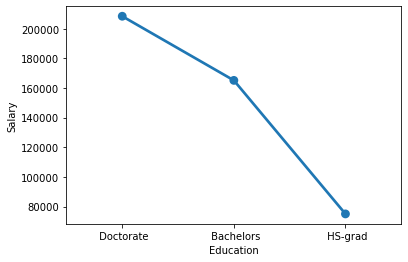

In [11]:
sns.pointplot(x='Education', y='Salary', data=salary_df,ci=None)

### 1.3	Perform a one-way ANOVA on Salary with respect to Occupation. State whether the null hypothesis is accepted or rejected based on the ANOVA results.


In [12]:
formula = 'Salary ~ C(Occupation)'
model = ols(formula, salary_df).fit()
aov_table = anova_lm(model)
print(aov_table)

                 df        sum_sq       mean_sq         F    PR(>F)
C(Occupation)   3.0  1.125878e+10  3.752928e+09  0.884144  0.458508
Residual       36.0  1.528092e+11  4.244701e+09       NaN       NaN


In [13]:
compare = MultiComparison(salary_df['Salary'],salary_df['Occupation'])
result = compare.tukeyhsd()
print(result)

                Multiple Comparison of Means - Tukey HSD, FWER=0.05                 
     group1           group2        meandiff  p-adj     lower        upper    reject
------------------------------------------------------------------------------------
    Adm-clerical  Exec-managerial     55693.3 0.4146  -40415.1459 151801.7459  False
    Adm-clerical   Prof-specialty  27528.8538 0.7252  -46277.4011 101335.1088  False
    Adm-clerical            Sales  16180.1167    0.9  -58951.3115  91311.5449  False
 Exec-managerial   Prof-specialty -28164.4462 0.8263 -120502.4542  64173.5618  False
 Exec-managerial            Sales -39513.1833 0.6507 -132913.8041  53887.4374  False
  Prof-specialty            Sales -11348.7372    0.9  -81592.6398  58895.1655  False
------------------------------------------------------------------------------------


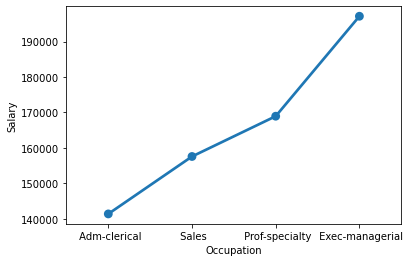

In [14]:
sns.pointplot(x='Occupation', y='Salary', data=salary_df,ci=None)

### 1.4	If the null hypothesis is rejected in either (2) or in (3), find out which class means are significantly different. Interpret the result. (Non-Graded)

Text(0.5, 1.0, 'Box Plot')

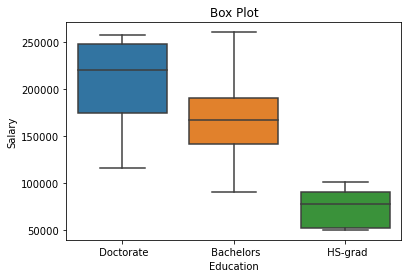

In [15]:
sns.boxplot("Education","Salary",data=salary_df)
plt.xlabel("Education")
plt.ylabel("Salary")
plt.title("Box Plot")

### 1.5	What is the interaction between two treatments? Analyze the effects of one variable on the other (Education and Occupation) with the help of an interaction plot.[hint: use the ‘pointplot’ function from the ‘seaborn’ function]

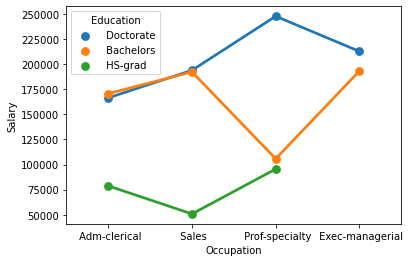

In [16]:
sns.pointplot(x='Occupation', y='Salary', data=salary_df,ci=None,hue='Education')

### 1.6	Perform a two-way ANOVA based on Salary with respect to both Education and Occupation (along with their interaction Education*Occupation). State the null and alternative hypotheses and state your results. How will you interpret this result?

In [17]:
formula = 'Salary ~ C(Occupation) + C(Education) + C(Occupation):C(Education)'
model = ols(formula, salary_df).fit()
aov_table = anova_lm(model)
(aov_table)

df        sum_sq       mean_sq          F  \
C(Occupation)                3.0  1.125878e+10  3.752928e+09   5.277862   
C(Education)                 2.0  9.695663e+10  4.847831e+10  68.176603   
C(Occupation):C(Education)   6.0  3.523330e+10  5.872217e+09   8.258287   
Residual                    29.0  2.062102e+10  7.110697e+08        NaN   

                                  PR(>F)  
C(Occupation)               4.993238e-03  
C(Education)                1.090908e-11  
C(Occupation):C(Education)  2.913740e-05  
Residual                             NaN

### 1.7	Explain the business implications of performing ANOVA for this particular case study.

## 2	Problem Statement: 2
The dataset Education - Post 12th Standard.csv contains information on various colleges. You are expected to do a Principal Component Analysis for this case study according to the instructions given. The data dictionary of the 'Education - Post 12th Standard.csv' can be found in the following file: Data Dictionary.xlsx.


In [18]:
std_df = pd.read_csv('Education+-+Post+12th+Standard.csv')

In [19]:
std_df.head()

Names  Apps  Accept  Enroll  Top10perc  Top25perc  \
0  Abilene Christian University  1660    1232     721         23         52   
1            Adelphi University  2186    1924     512         16         29   
2                Adrian College  1428    1097     336         22         50   
3           Agnes Scott College   417     349     137         60         89   
4     Alaska Pacific University   193     146      55         16         44   

   F.Undergrad  P.Undergrad  Outstate  Room.Board  Books  Personal  PhD  \
0         2885          537      7440        3300    450      2200   70   
1         2683         1227     12280        6450    750      1500   29   
2         1036           99     11250        3750    400      1165   53   
3          510           63     12960        5450    450       875   92   
4          249          869      7560        4120    800      1500   76   

   Terminal  S.F.Ratio  perc.alumni  Expend  Grad.Rate  
0        78       18.1           12    7041         60  
1        30       12.2           16   10527         56  
2        66       12.9           30    8735         54  
3        97        7.7           37   19016         59  
4        72       11.9            2   10922         15

In [20]:
std_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Names        777 non-null    object 
 1   Apps         777 non-null    int64  
 2   Accept       777 non-null    int64  
 3   Enroll       777 non-null    int64  
 4   Top10perc    777 non-null    int64  
 5   Top25perc    777 non-null    int64  
 6   F.Undergrad  777 non-null    int64  
 7   P.Undergrad  777 non-null    int64  
 8   Outstate     777 non-null    int64  
 9   Room.Board   777 non-null    int64  
 10  Books        777 non-null    int64  
 11  Personal     777 non-null    int64  
 12  PhD          777 non-null    int64  
 13  Terminal     777 non-null    int64  
 14  S.F.Ratio    777 non-null    float64
 15  perc.alumni  777 non-null    int64  
 16  Expend       777 non-null    int64  
 17  Grad.Rate    777 non-null    int64  
dtypes: float64(1), int64(16), object(1)
memory usage: 

In [21]:
std_df.isnull().sum()

Names          0
Apps           0
Accept         0
Enroll         0
Top10perc      0
Top25perc      0
F.Undergrad    0
P.Undergrad    0
Outstate       0
Room.Board     0
Books          0
Personal       0
PhD            0
Terminal       0
S.F.Ratio      0
perc.alumni    0
Expend         0
Grad.Rate      0
dtype: int64

In [22]:
dups = std_df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

std_df[dups]

Number of duplicate rows = 0


Empty DataFrame
Columns: [Names, Apps, Accept, Enroll, Top10perc, Top25perc, F.Undergrad, P.Undergrad, Outstate, Room.Board, Books, Personal, PhD, Terminal, S.F.Ratio, perc.alumni, Expend, Grad.Rate]
Index: []

In [23]:
def univariateAnalysis_category(cat_column):
    fig,axs = plt.subplots(nrows=1,ncols=2, figsize=(10,5))
   
    sns.distplot(std_df[cat_column], color='y',ax=axs[0]);
    sns.boxplot(std_df[cat_column], color='y',ax=axs[1])
    plt.xticks(rotation=90)
    plt.show()

In [24]:
df_int = std_df.select_dtypes(include = ['int64','float64'])
lstcatcolumns = list(df_int.columns.values)


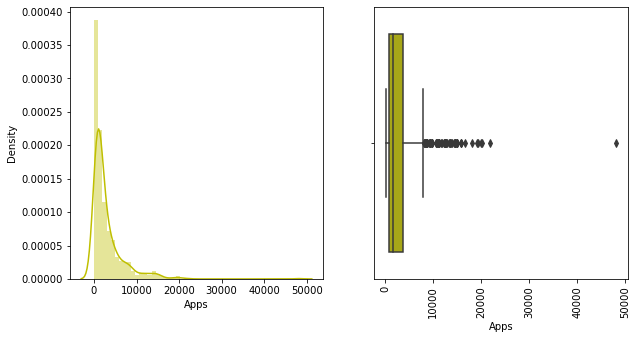

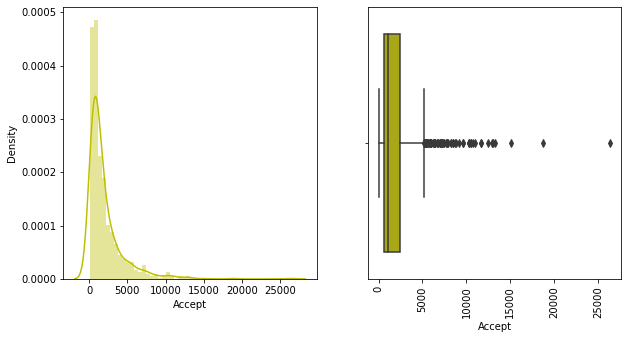

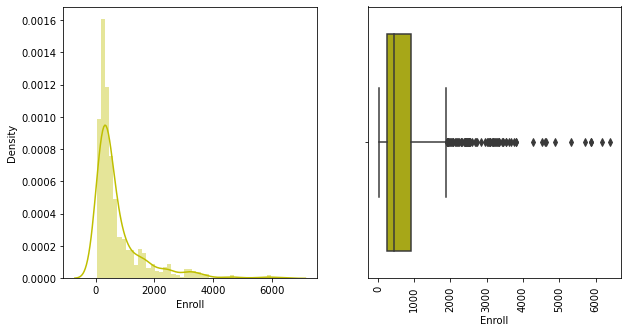

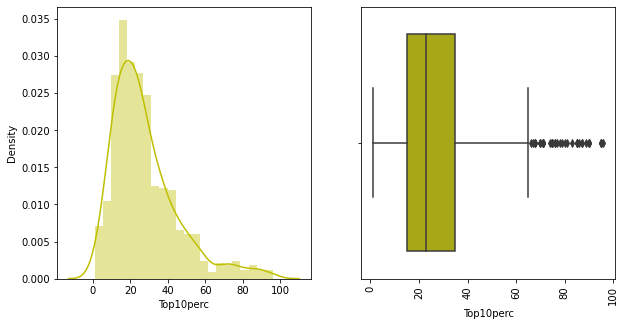

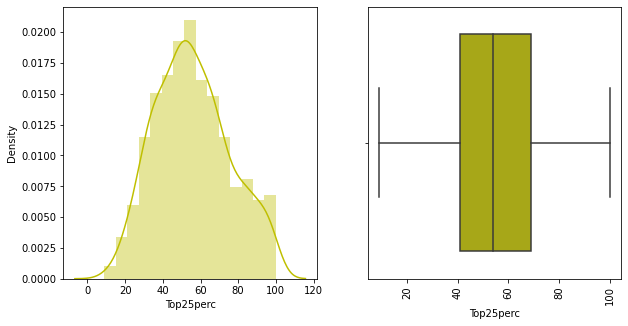

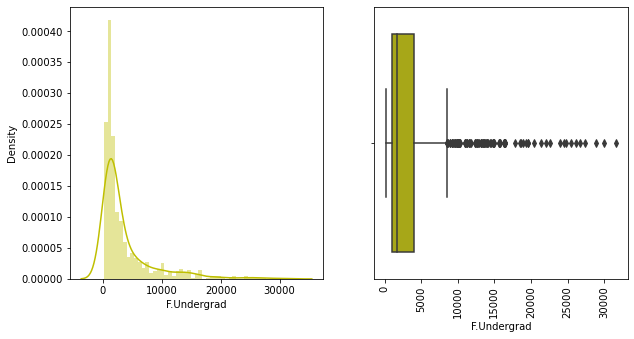

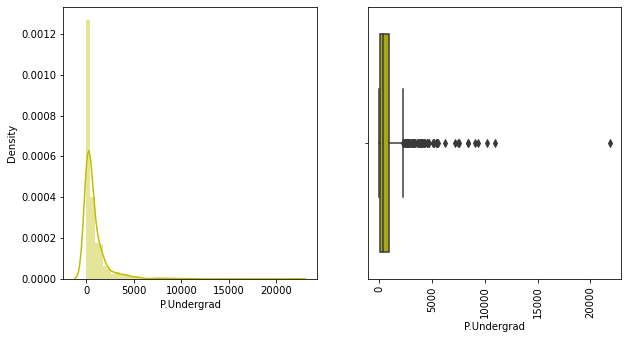

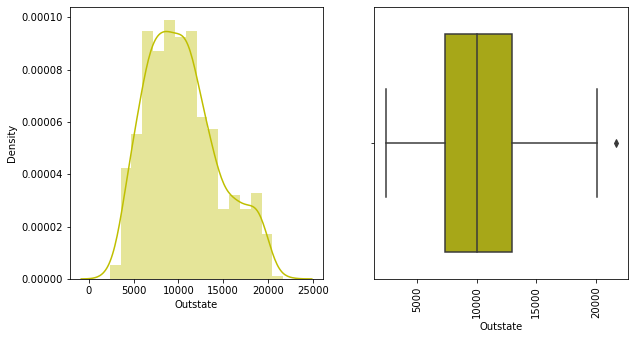

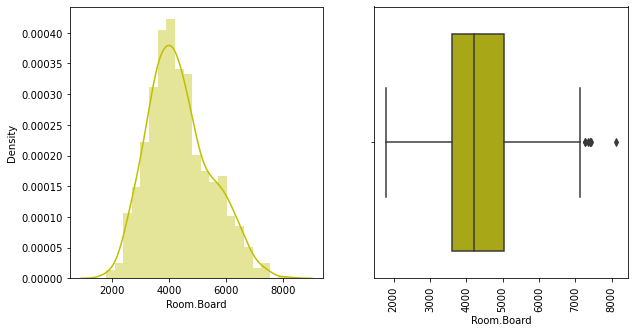

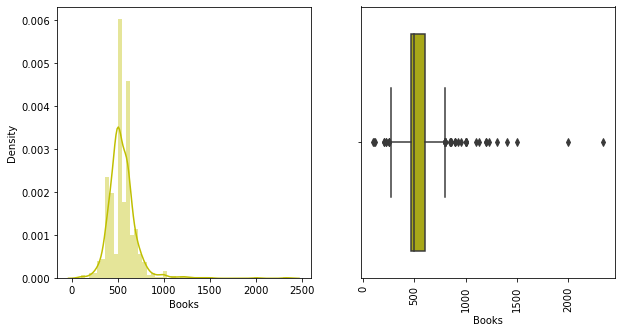

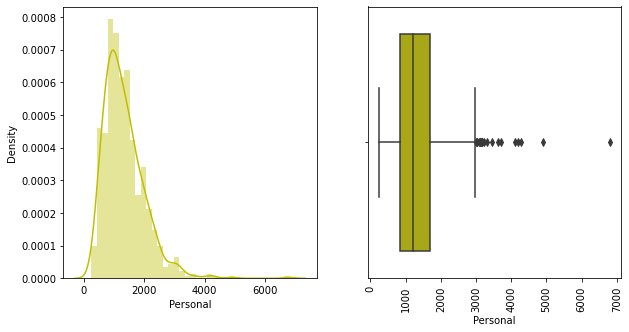

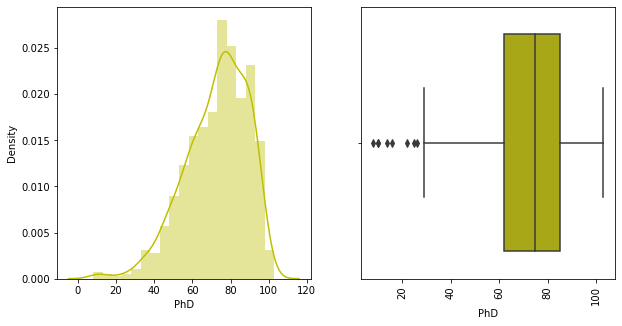

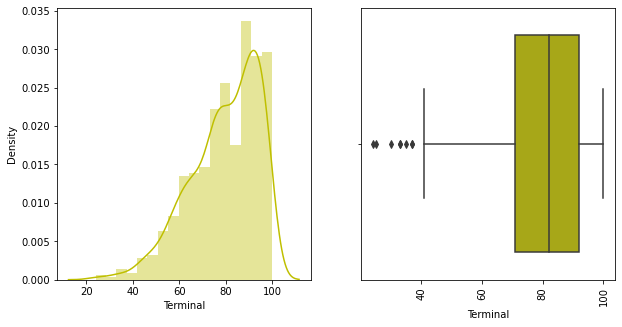

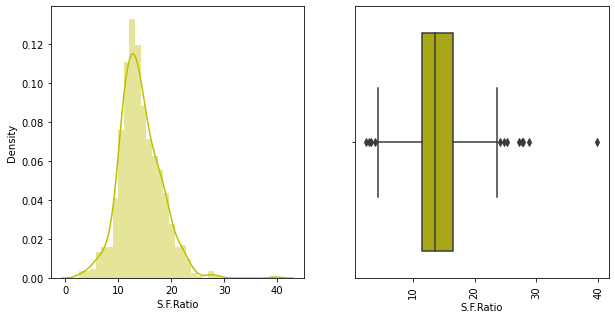

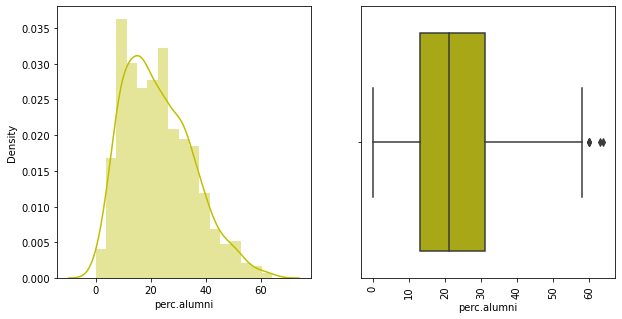

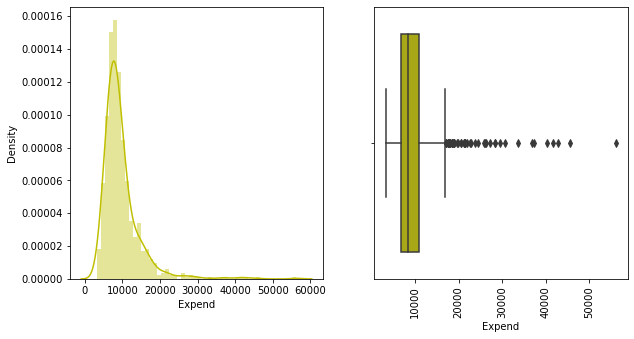

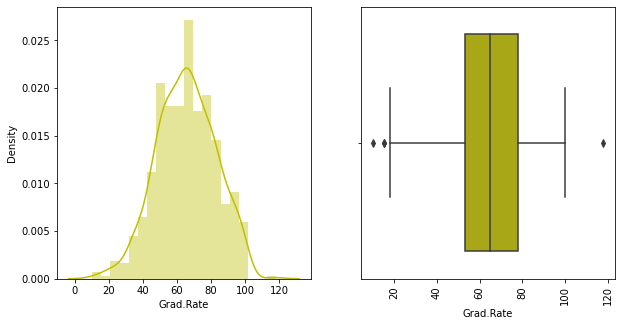

In [25]:
for x in lstcatcolumns:
    univariateAnalysis_category(x)

In [26]:
df_eda = std_df.select_dtypes(include = ['int64','float64'])

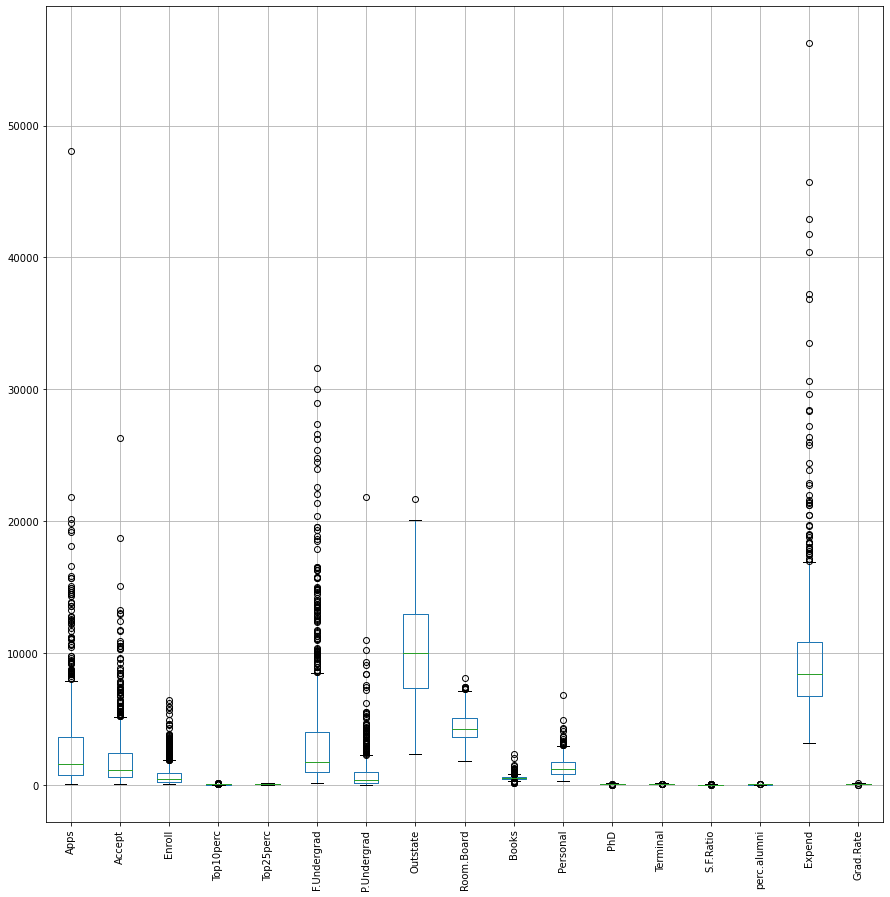

In [27]:
#outlier Treatment - BEFORE
df_eda.boxplot(figsize=(15,15))
plt.xticks(rotation=90)
plt.show()

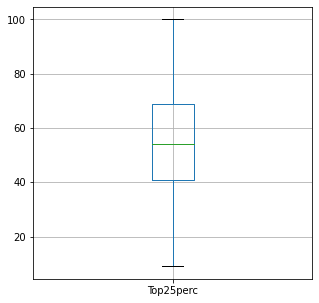

In [28]:
no_outlier = ['Top25perc']
df_eda[no_outlier].boxplot(figsize=(5,5))
plt.xticks()
plt.show()

In [29]:
def treat_outlier(x):
    # taking 5,25,75 percentile of column
    q5= np.percentile(x,5)
    q25=np.percentile(x,25)
    q75=np.percentile(x,75)
    dt=np.percentile(x,95)
    #calculationg IQR range
    IQR=q75-q25
    #Calculating minimum threshold
    lower_bound=q25-(1.5*IQR)
    upper_bound=q75+(1.5*IQR)
    #Capping outliers
    return x.apply(lambda y: dt if y > upper_bound else y).apply(lambda y: q5 if y < lower_bound else y)

In [30]:
outlier_list = [x for x in df_eda.columns if x not in no_outlier]

In [31]:
for i in df_eda[outlier_list]:    
    df_eda[i]=treat_outlier(df_eda[i])

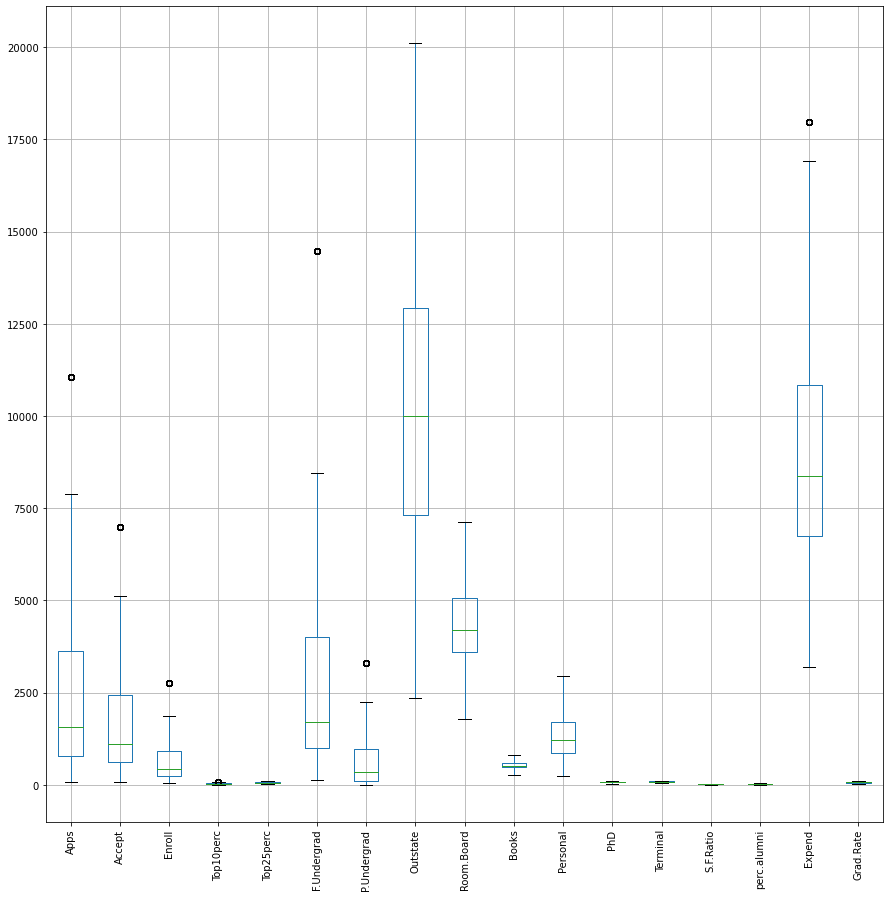

In [32]:
#outlier Treatment
df_eda.boxplot(figsize=(15,15))
plt.xticks(rotation=90)
plt.show()

### 2.1	Perform Exploratory Data Analysis [both univariate and multivariate analysis to be performed]. What insight do you draw from the EDA?

In [33]:
def univariateAnalysis_category(cat_column):
    fig,axs = plt.subplots(nrows=1,ncols=2, figsize=(10,5))
   
    sns.distplot(df_eda[cat_column], color='y',ax=axs[0]);
    sns.boxplot(df_eda[cat_column], color='y',ax=axs[1])
    plt.xticks(rotation=90)
    plt.show()

In [34]:
##df_int = df_eda.select_dtypes(include = ['int64','float64'])
lstcatcolumns = list(df_eda.columns.values)

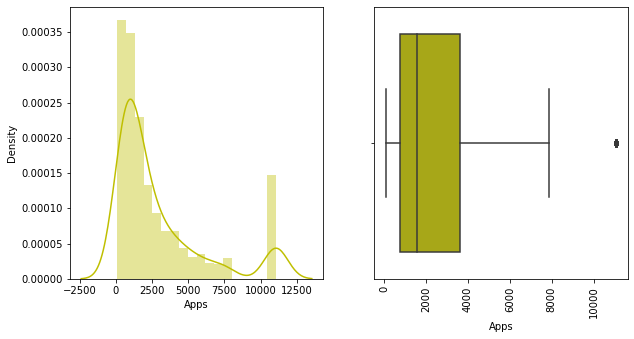

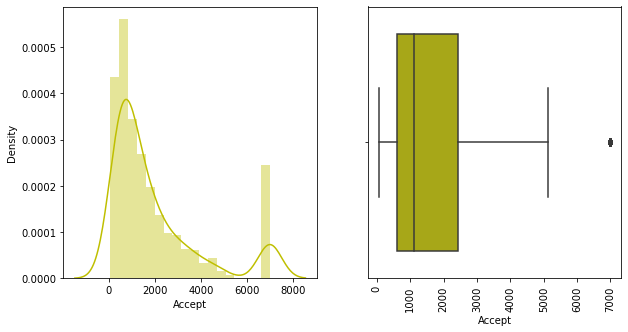

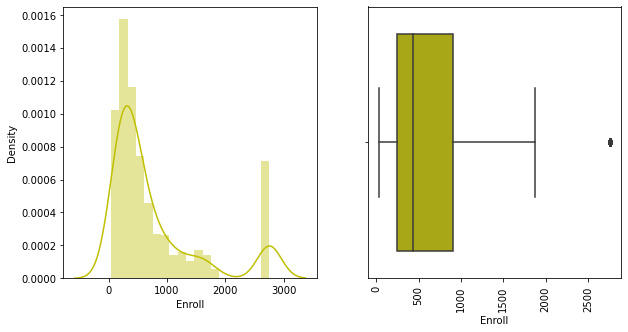

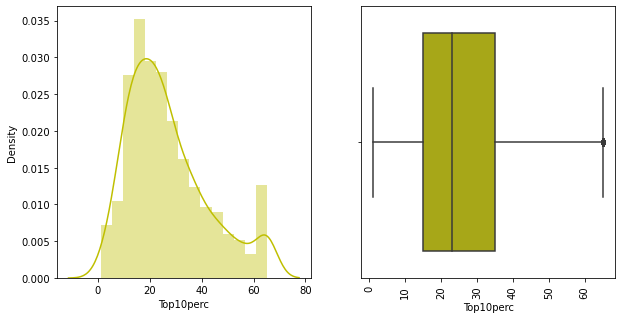

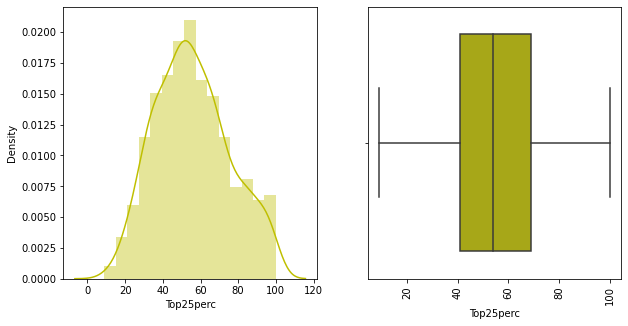

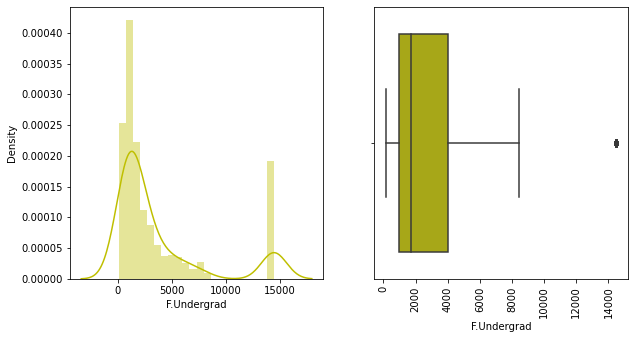

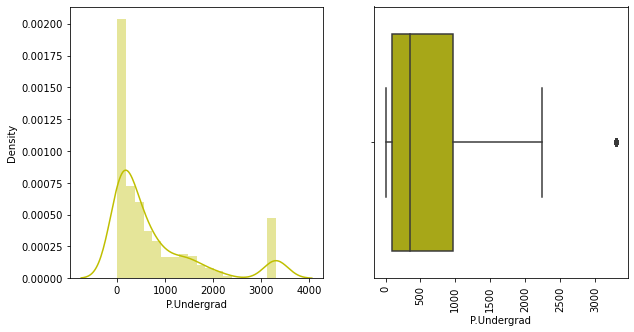

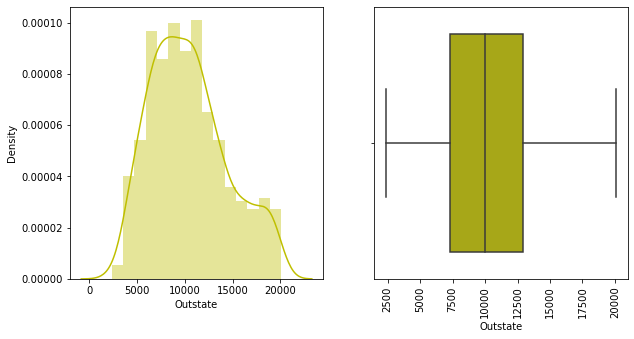

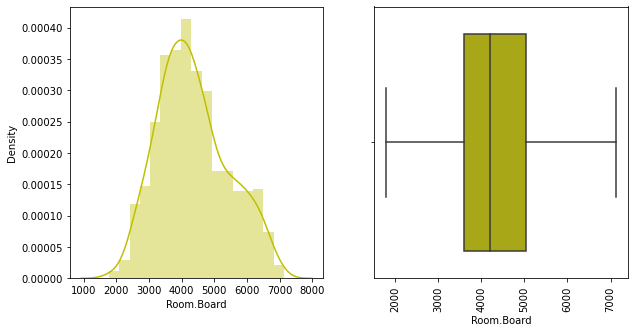

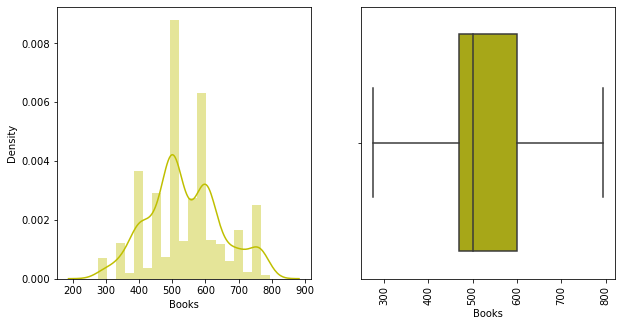

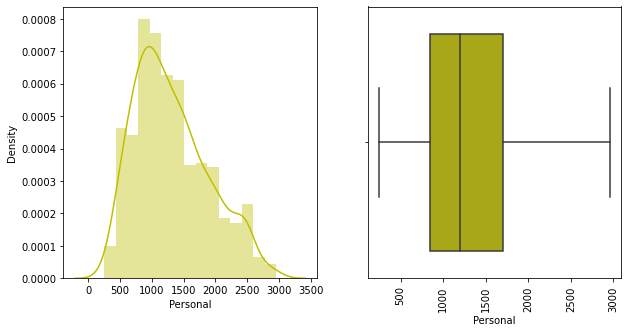

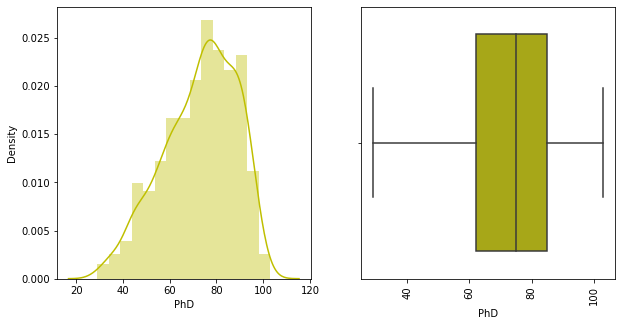

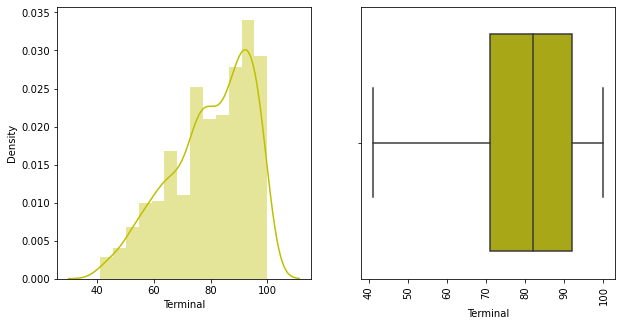

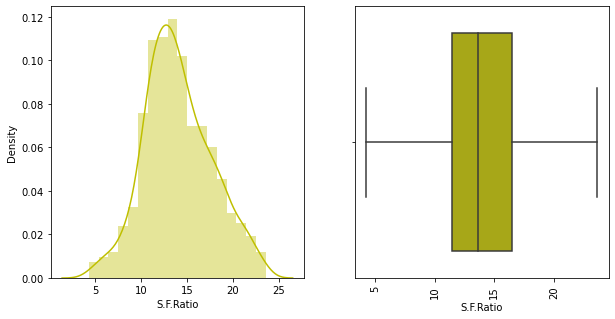

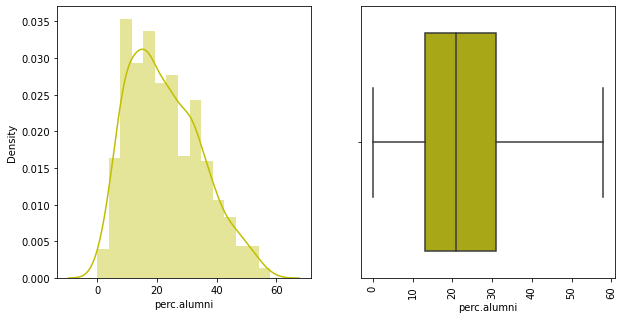

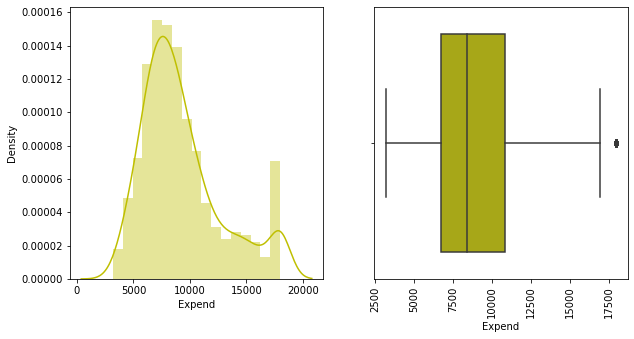

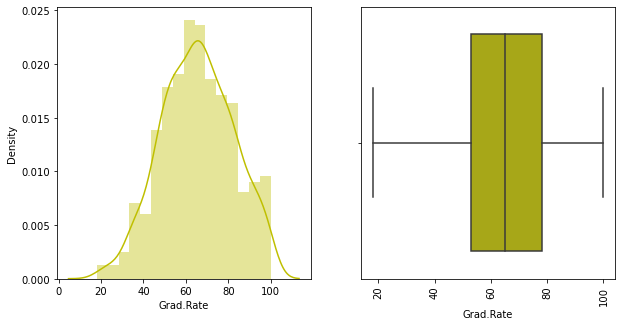

In [35]:
for x in lstcatcolumns:
    univariateAnalysis_category(x)

In [36]:
df_eda.describe()

Apps       Accept       Enroll   Top10perc   Top25perc  \
count    777.000000   777.000000   777.000000  777.000000  777.000000   
mean    2856.956242  1917.760103   748.335907   26.853024   55.796654   
std     3120.470980  1942.822994   781.271463   15.607194   19.804778   
min       81.000000    72.000000    35.000000    1.000000    9.000000   
25%      776.000000   604.000000   242.000000   15.000000   41.000000   
50%     1558.000000  1110.000000   434.000000   23.000000   54.000000   
75%     3624.000000  2424.000000   902.000000   35.000000   69.000000   
max    11066.200000  6979.200000  2757.000000   65.200000  100.000000   

        F.Undergrad  P.Undergrad      Outstate   Room.Board       Books  \
count    777.000000   777.000000    777.000000   777.000000  777.000000   
mean    3678.852767   744.579408  10436.548263  4347.803089  539.029086   
std     4414.345270   940.269547   4013.095875  1073.326060  110.372183   
min      139.000000     1.000000   2340.000000  1780.000000  275.000000   
25%      992.000000    95.000000   7320.000000  3597.000000  470.000000   
50%     1707.000000   353.000000   9990.000000  4200.000000  500.000000   
75%     4005.000000   967.000000  12925.000000  5050.000000  600.000000   
max    14477.800000  3303.600000  20100.000000  7131.000000  795.000000   

          Personal         PhD    Terminal   S.F.Ratio  perc.alumni  \
count   777.000000  777.000000  777.000000  777.000000   777.000000   
mean   1311.275418   72.942600   79.919434   14.042471    22.644788   
std     579.698842   15.556248   14.150183    3.667058    12.140180   
min     250.000000   29.000000   41.000000    4.300000     0.000000   
25%     850.000000   62.000000   71.000000   11.500000    13.000000   
50%    1200.000000   75.000000   82.000000   13.600000    21.000000   
75%    1700.000000   85.000000   92.000000   16.500000    31.000000   
max    2958.000000  103.000000  100.000000   23.600000    58.000000   

             Expend   Grad.Rate  
count    777.000000  777.000000  
mean    9245.924582   65.524067  
std     3547.297573   16.887333  
min     3186.000000   18.000000  
25%     6751.000000   53.000000  
50%     8377.000000   65.000000  
75%    10830.000000   78.000000  
max    17974.800000  100.000000

In [37]:
corr = df_eda.corr(method='pearson')
corr

Apps    Accept    Enroll  Top10perc  Top25perc  F.Undergrad  \
Apps         1.000000  0.933721  0.869927   0.323850   0.362402     0.816797   
Accept       0.933721  1.000000  0.921169   0.220338   0.267999     0.870428   
Enroll       0.869927  0.921169  1.000000   0.167349   0.224570     0.947269   
Top10perc    0.323850  0.220338  0.167349   1.000000   0.913717     0.103675   
Top25perc    0.362402  0.267999  0.224570   0.913717   1.000000     0.168115   
F.Undergrad  0.816797  0.870428  0.947269   0.103675   0.168115     1.000000   
P.Undergrad  0.501112  0.556221  0.641672  -0.146407  -0.068976     0.682826   
Outstate     0.063205 -0.014237 -0.160551   0.563581   0.490749    -0.233126   
Room.Board   0.182724  0.110183 -0.037202   0.355060   0.329582    -0.079608   
Books        0.232991  0.213630  0.213123   0.153943   0.171750     0.202379   
Personal     0.229238  0.256020  0.347087  -0.120176  -0.088003     0.364438   
PhD          0.446195  0.407037  0.360814   0.546490   0.554801     0.331159   
Terminal     0.416730  0.383561  0.335650   0.510105   0.527806     0.311108   
S.F.Ratio    0.114067  0.182299  0.267559  -0.382899  -0.290843     0.308149   
perc.alumni -0.100481 -0.162400 -0.213467   0.450047   0.412259    -0.270638   
Expend       0.254206  0.166054  0.057268   0.662904   0.576125     0.000221   
Grad.Rate    0.146968  0.069452 -0.040492   0.498954   0.486738    -0.103195   

             P.Undergrad  Outstate  Room.Board     Books  Personal       PhD  \
Apps            0.501112  0.063205    0.182724  0.232991  0.229238  0.446195   
Accept          0.556221 -0.014237    0.110183  0.213630  0.256020  0.407037   
Enroll          0.641672 -0.160551   -0.037202  0.213123  0.347087  0.360814   
Top10perc      -0.146407  0.563581    0.355060  0.153943 -0.120176  0.546490   
Top25perc      -0.068976  0.490749    0.329582  0.171750 -0.088003  0.554801   
F.Undergrad     0.682826 -0.233126   -0.079608  0.202379  0.364438  0.331159   
P.Undergrad     1.000000 -0.335734   -0.074810  0.136037  0.331455  0.150676   
Outstate       -0.335734  1.000000    0.659314 -0.004340 -0.330512  0.401629   
Room.Board     -0.074810  0.659314    1.000000  0.107052 -0.226698  0.352936   
Books           0.136037 -0.004340    0.107052  1.000000  0.237367  0.152585   
Personal        0.331455 -0.330512   -0.226698  0.237367  1.000000 -0.017993   
PhD             0.150676  0.401629    0.352936  0.152585 -0.017993  1.000000   
Terminal        0.142498  0.419211    0.383446  0.168940 -0.034483  0.866535   
S.F.Ratio       0.350515 -0.578969   -0.382253 -0.003635  0.186528 -0.132716   
perc.alumni    -0.393735  0.562757    0.272121 -0.048824 -0.309050  0.243272   
Expend         -0.166944  0.773354    0.581051  0.145813 -0.167221  0.523549   
Grad.Rate      -0.276314  0.580301    0.430189 -0.003494 -0.289016  0.318781   

             Terminal  S.F.Ratio  perc.alumni    Expend  Grad.Rate  
Apps         0.416730   0.114067    -0.100481  0.254206   0.146968  
Accept       0.383561   0.182299    -0.162400  0.166054   0.069452  
Enroll       0.335650   0.267559    -0.213467  0.057268  -0.040492  
Top10perc    0.510105  -0.382899     0.450047  0.662904   0.498954  
Top25perc    0.527806  -0.290843     0.412259  0.576125   0.486738  
F.Undergrad  0.311108   0.308149    -0.270638  0.000221  -0.103195  
P.Undergrad  0.142498   0.350515    -0.393735 -0.166944  -0.276314  
Outstate     0.419211  -0.578969     0.562757  0.773354   0.580301  
Room.Board   0.383446  -0.382253     0.272121  0.581051   0.430189  
Books        0.168940  -0.003635    -0.048824  0.145813  -0.003494  
Personal    -0.034483   0.186528    -0.309050 -0.167221  -0.289016  
PhD          0.866535  -0.132716     0.243272  0.523549   0.318781  
Terminal     1.000000  -0.152132     0.263103  0.527427   0.293958  
S.F.Ratio   -0.152132   1.000000    -0.413352 -0.655492  -0.317034  
perc.alumni  0.263103  -0.413352     1.000000  0.459584   0.491641  
Expend       0.527427  -0.65549

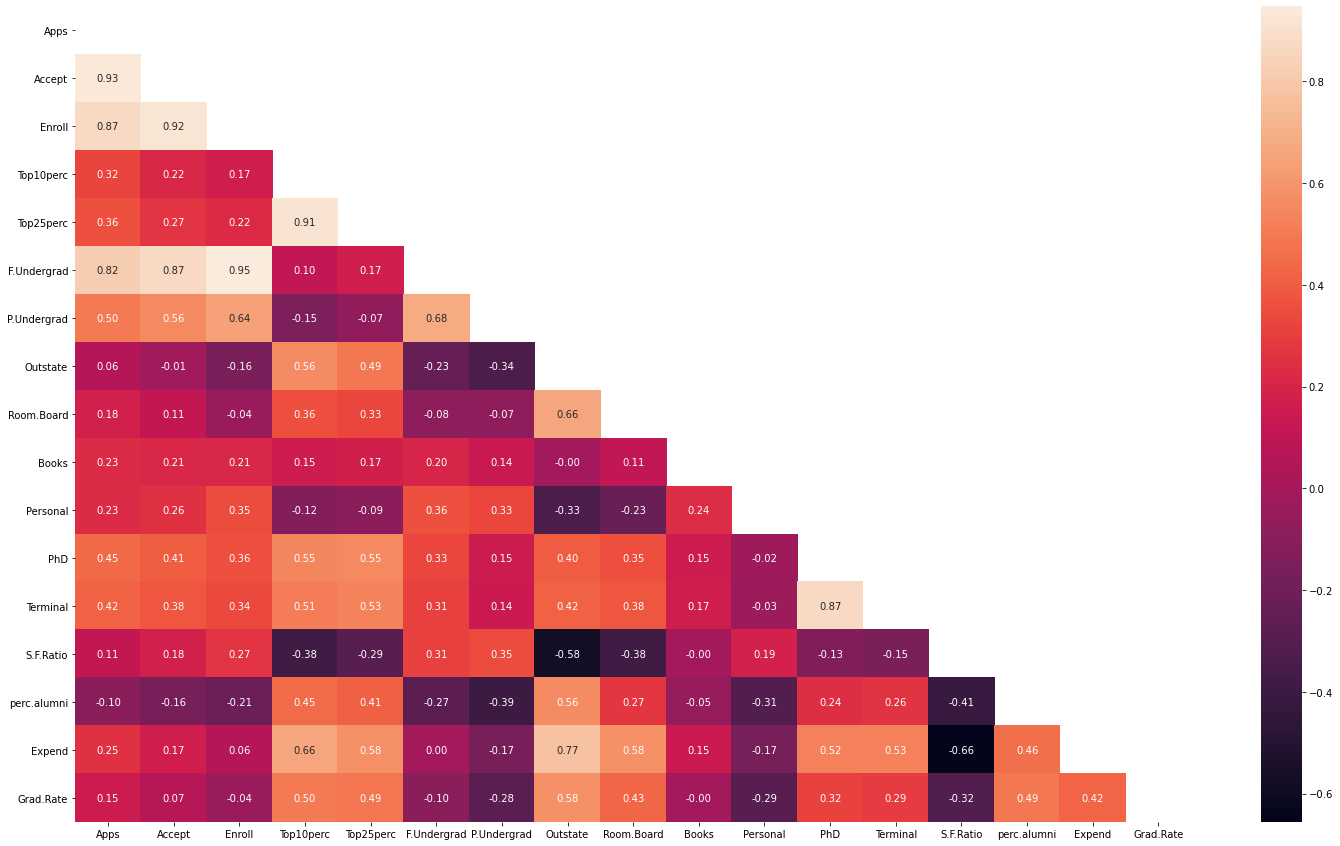

In [38]:
mask = np.triu(np.ones_like(corr, dtype=np.bool)) 
fig = plt.subplots(figsize=(25, 15))
sns.heatmap(df_eda.corr(), annot=True,fmt='.2f',mask=mask)
plt.show()

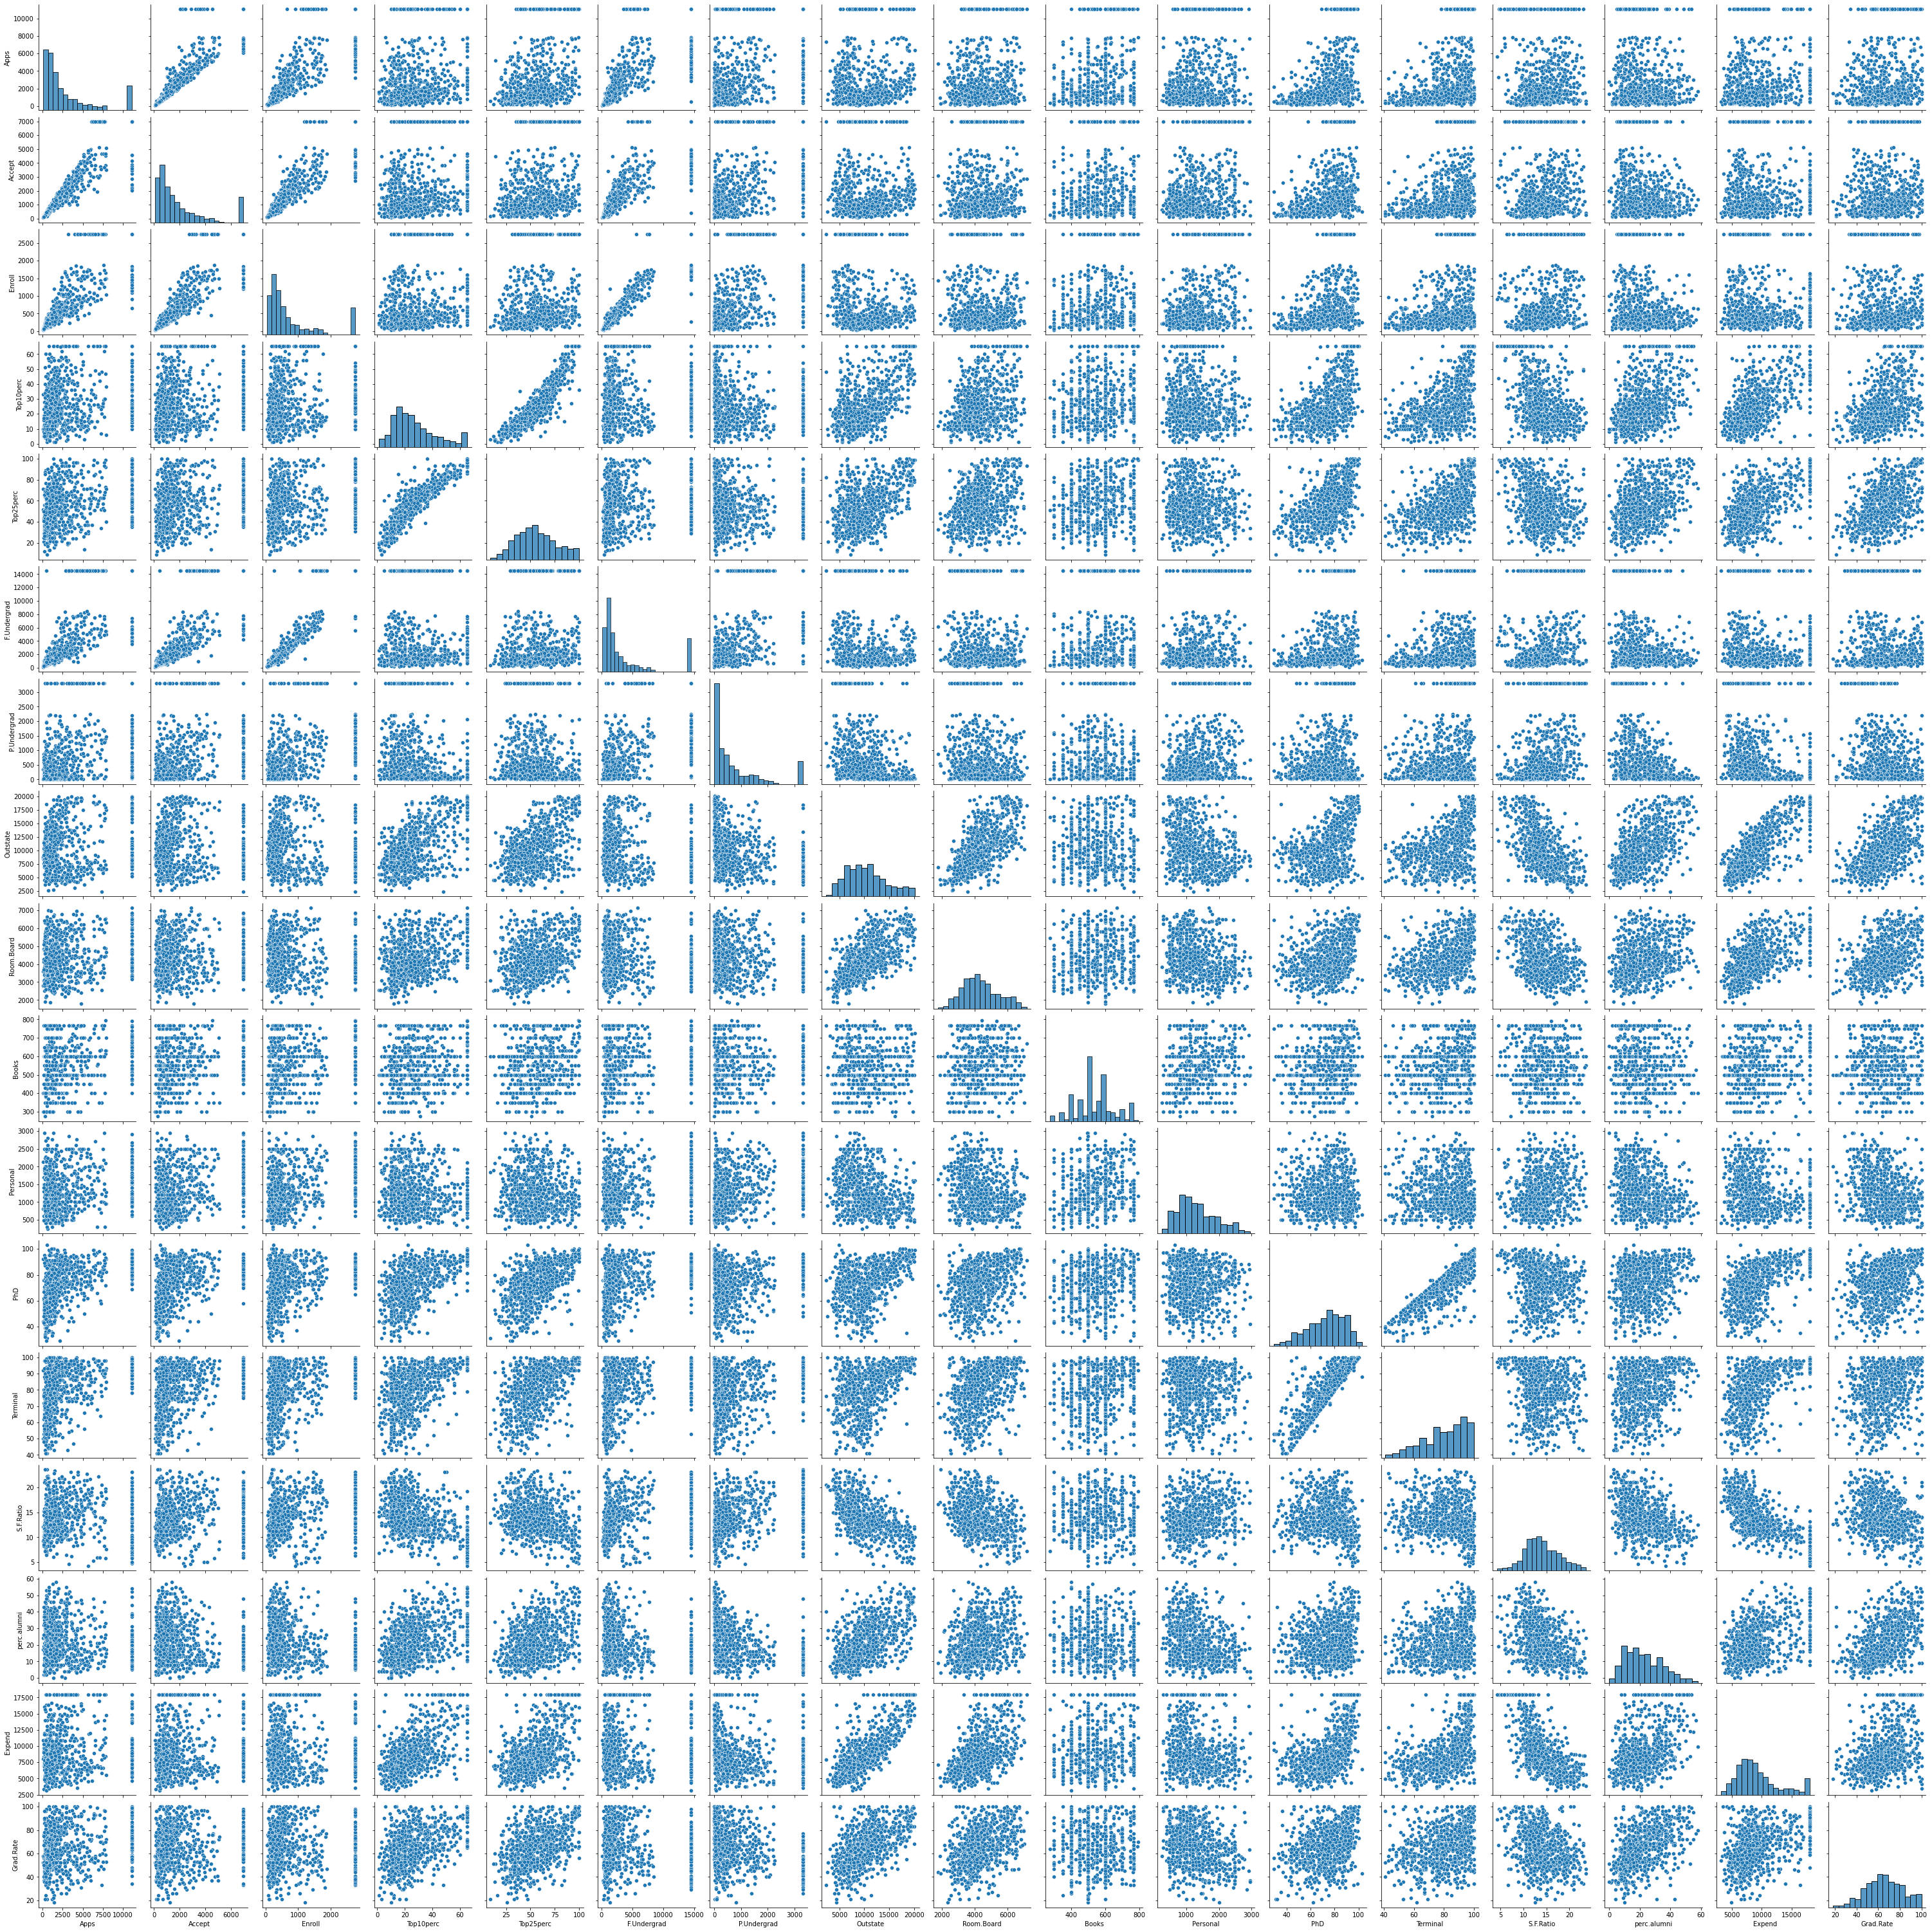

In [39]:
sns.pairplot(df_eda)
plt.show()

### 2.2	Is scaling necessary for PCA in this case? Give justification and perform scaling.

In [40]:
df_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Apps         777 non-null    float64
 1   Accept       777 non-null    float64
 2   Enroll       777 non-null    float64
 3   Top10perc    777 non-null    float64
 4   Top25perc    777 non-null    int64  
 5   F.Undergrad  777 non-null    float64
 6   P.Undergrad  777 non-null    float64
 7   Outstate     777 non-null    float64
 8   Room.Board   777 non-null    float64
 9   Books        777 non-null    float64
 10  Personal     777 non-null    float64
 11  PhD          777 non-null    float64
 12  Terminal     777 non-null    float64
 13  S.F.Ratio    777 non-null    float64
 14  perc.alumni  777 non-null    float64
 15  Expend       777 non-null    float64
 16  Grad.Rate    777 non-null    float64
dtypes: float64(16), int64(1)
memory usage: 103.3 KB


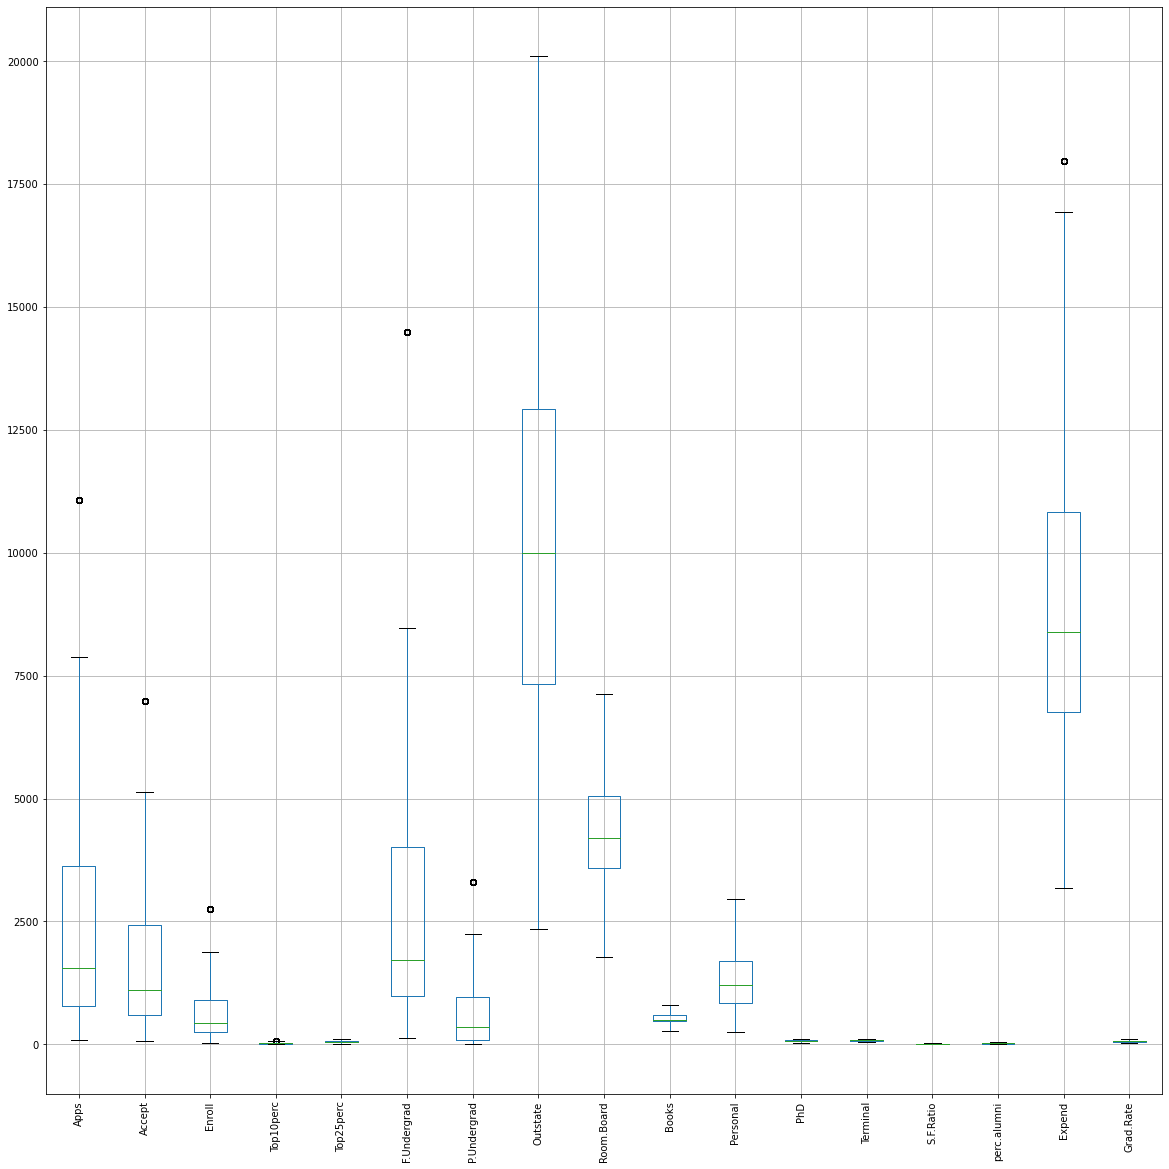

In [41]:
# Treated Data
df_eda.boxplot(figsize=(20,20))
plt.xticks(rotation=90)
plt.show()

In [42]:
df_eda.describe()

Apps       Accept       Enroll   Top10perc   Top25perc  \
count    777.000000   777.000000   777.000000  777.000000  777.000000   
mean    2856.956242  1917.760103   748.335907   26.853024   55.796654   
std     3120.470980  1942.822994   781.271463   15.607194   19.804778   
min       81.000000    72.000000    35.000000    1.000000    9.000000   
25%      776.000000   604.000000   242.000000   15.000000   41.000000   
50%     1558.000000  1110.000000   434.000000   23.000000   54.000000   
75%     3624.000000  2424.000000   902.000000   35.000000   69.000000   
max    11066.200000  6979.200000  2757.000000   65.200000  100.000000   

        F.Undergrad  P.Undergrad      Outstate   Room.Board       Books  \
count    777.000000   777.000000    777.000000   777.000000  777.000000   
mean    3678.852767   744.579408  10436.548263  4347.803089  539.029086   
std     4414.345270   940.269547   4013.095875  1073.326060  110.372183   
min      139.000000     1.000000   2340.000000  1780.000000  275.000000   
25%      992.000000    95.000000   7320.000000  3597.000000  470.000000   
50%     1707.000000   353.000000   9990.000000  4200.000000  500.000000   
75%     4005.000000   967.000000  12925.000000  5050.000000  600.000000   
max    14477.800000  3303.600000  20100.000000  7131.000000  795.000000   

          Personal         PhD    Terminal   S.F.Ratio  perc.alumni  \
count   777.000000  777.000000  777.000000  777.000000   777.000000   
mean   1311.275418   72.942600   79.919434   14.042471    22.644788   
std     579.698842   15.556248   14.150183    3.667058    12.140180   
min     250.000000   29.000000   41.000000    4.300000     0.000000   
25%     850.000000   62.000000   71.000000   11.500000    13.000000   
50%    1200.000000   75.000000   82.000000   13.600000    21.000000   
75%    1700.000000   85.000000   92.000000   16.500000    31.000000   
max    2958.000000  103.000000  100.000000   23.600000    58.000000   

             Expend   Grad.Rate  
count    777.000000  777.000000  
mean    9245.924582   65.524067  
std     3547.297573   16.887333  
min     3186.000000   18.000000  
25%     6751.000000   53.000000  
50%     8377.000000   65.000000  
75%    10830.000000   78.000000  
max    17974.800000  100.000000

### Method 1 Using Zscore

In [43]:
from scipy.stats import zscore
std_df_scaled=df_eda.apply(zscore)
std_df_scaled.head()

Apps    Accept    Enroll  Top10perc  Top25perc  F.Undergrad  \
0 -0.383829 -0.353198 -0.035012  -0.247034  -0.191827    -0.179951   
1 -0.215156  0.003214 -0.302696  -0.695834  -1.353911    -0.225740   
2 -0.458225 -0.422730 -0.528115  -0.311148  -0.292878    -0.599082   
3 -0.782423 -0.807984 -0.782992   2.125195   1.677612    -0.718316   
4 -0.854253 -0.912539 -0.888017  -0.695834  -0.596031    -0.777479   

   P.Undergrad  Outstate  Room.Board     Books  Personal       PhD  Terminal  \
0    -0.220908 -0.747173   -0.976849 -0.807146  1.534067 -0.189281 -0.135735   
1     0.513397  0.459655    1.959843  1.912681  0.325766 -2.826575 -1.917777   
2    -0.687032  0.202830   -0.557322 -1.260450 -0.252493 -1.282793 -0.984326   
3    -0.725344  0.629209    1.027560 -0.807146 -0.753075  1.225853  1.207869   
4     0.132410 -0.717252   -0.212377  2.054112  0.325766  0.196665 -0.560031   

   S.F.Ratio  perc.alumni    Expend  Grad.Rate  
0   1.107193    -0.877388 -0.621979  -0.327324  
1  -0.502762    -0.547691  0.361374  -0.564340  
2  -0.311750     0.606247 -0.144125  -0.682848  
3  -1.730694     1.183216  2.462296  -0.386578  
4  -0.584624    -1.701629  0.472798  -1.690169

In [44]:
std_df_scaled.describe()

Apps        Accept        Enroll     Top10perc     Top25perc  \
count  7.770000e+02  7.770000e+02  7.770000e+02  7.770000e+02  7.770000e+02   
mean  -1.614164e-16  2.286709e-16 -3.670023e-16  2.413342e-16 -1.546739e-16   
std    1.000644e+00  1.000644e+00  1.000644e+00  1.000644e+00  1.000644e+00   
min   -8.901683e-01 -9.506522e-01 -9.136330e-01 -1.657548e+00 -2.364419e+00   
25%   -6.673020e-01 -6.766475e-01 -6.485096e-01 -7.599482e-01 -7.476067e-01   
50%   -4.165374e-01 -4.160340e-01 -4.025981e-01 -2.470339e-01 -9.077663e-02   
75%    2.459686e-01  2.607371e-01  1.968113e-01  5.223375e-01  6.671042e-01   
max    2.632465e+00  2.606877e+00  2.572675e+00  2.458589e+00  2.233391e+00   

        F.Undergrad   P.Undergrad      Outstate    Room.Board         Books  \
count  7.770000e+02  7.770000e+02  7.770000e+02  7.770000e+02  7.770000e+02   
mean   4.240137e-17 -1.477440e-16  1.963252e-16 -1.331696e-16  5.216048e-16   
std    1.000644e+00  1.000644e+00  1.000644e+00  1.000644e+00  1.000644e+00   
min   -8.024141e-01 -7.913245e-01 -2.018831e+00 -2.393920e+00 -2.393711e+00   
25%   -6.090560e-01 -6.912888e-01 -7.770947e-01 -6.999613e-01 -6.258239e-01   
50%   -4.469797e-01 -4.167227e-01 -1.113444e-01 -1.377944e-01 -3.538412e-01   
75%    7.393108e-02  2.367022e-01  6.204822e-01  6.546466e-01  5.527678e-01   
max    2.447906e+00  2.723335e+00  2.409530e+00  2.594728e+00  2.320655e+00   

           Personal           PhD      Terminal     S.F.Ratio   perc.alumni  \
count  7.770000e+02  7.770000e+02  7.770000e+02  7.770000e+02  7.770000e+02   
mean   8.165926e-17  7.412203e-17 -5.379652e-16 -8.687459e-17  4.422317e-17   
std    1.000644e+00  1.000644e+00  1.000644e+00  1.000644e+00  1.000644e+00   
min   -1.831915e+00 -2.826575e+00 -2.752226e+00 -2.658465e+00 -1.866478e+00   
25%   -7.962281e-01 -7.038746e-01 -6.307465e-01 -6.937737e-01 -7.949635e-01   
50%   -1.920775e-01  1.323407e-01  1.471293e-01 -1.207387e-01 -1.355702e-01   
75%    6.709949e-01  7.755833e-01  8.542891e-01  6.705952e-01  6.886713e-01   
max    2.842485e+00  1.933420e+00  1.420017e+00  2.607999e+00  2.914124e+00   

             Expend     Grad.Rate  
count  7.770000e+02  7.770000e+02  
mean   1.103079e-16  5.509678e-16  
std    1.000644e+00  1.000644e+00  
min   -1.709422e+00 -2.815997e+00  
25%   -7.037841e-01 -7.421026e-01  
50%   -2.451117e-01 -3.105313e-02  
75%    4.468460e-01  7.392505e-01  
max    2.462296e+00  2.042841e+00

### 2.3	Comment on the comparison between the covariance and the correlation matrices from this data.[on scaled data]

In [45]:
corr1 = std_df_scaled.corr(method='pearson')
corr1

Apps    Accept    Enroll  Top10perc  Top25perc  F.Undergrad  \
Apps         1.000000  0.933721  0.869927   0.323850   0.362402     0.816797   
Accept       0.933721  1.000000  0.921169   0.220338   0.267999     0.870428   
Enroll       0.869927  0.921169  1.000000   0.167349   0.224570     0.947269   
Top10perc    0.323850  0.220338  0.167349   1.000000   0.913717     0.103675   
Top25perc    0.362402  0.267999  0.224570   0.913717   1.000000     0.168115   
F.Undergrad  0.816797  0.870428  0.947269   0.103675   0.168115     1.000000   
P.Undergrad  0.501112  0.556221  0.641672  -0.146407  -0.068976     0.682826   
Outstate     0.063205 -0.014237 -0.160551   0.563581   0.490749    -0.233126   
Room.Board   0.182724  0.110183 -0.037202   0.355060   0.329582    -0.079608   
Books        0.232991  0.213630  0.213123   0.153943   0.171750     0.202379   
Personal     0.229238  0.256020  0.347087  -0.120176  -0.088003     0.364438   
PhD          0.446195  0.407037  0.360814   0.546490   0.554801     0.331159   
Terminal     0.416730  0.383561  0.335650   0.510105   0.527806     0.311108   
S.F.Ratio    0.114067  0.182299  0.267559  -0.382899  -0.290843     0.308149   
perc.alumni -0.100481 -0.162400 -0.213467   0.450047   0.412259    -0.270638   
Expend       0.254206  0.166054  0.057268   0.662904   0.576125     0.000221   
Grad.Rate    0.146968  0.069452 -0.040492   0.498954   0.486738    -0.103195   

             P.Undergrad  Outstate  Room.Board     Books  Personal       PhD  \
Apps            0.501112  0.063205    0.182724  0.232991  0.229238  0.446195   
Accept          0.556221 -0.014237    0.110183  0.213630  0.256020  0.407037   
Enroll          0.641672 -0.160551   -0.037202  0.213123  0.347087  0.360814   
Top10perc      -0.146407  0.563581    0.355060  0.153943 -0.120176  0.546490   
Top25perc      -0.068976  0.490749    0.329582  0.171750 -0.088003  0.554801   
F.Undergrad     0.682826 -0.233126   -0.079608  0.202379  0.364438  0.331159   
P.Undergrad     1.000000 -0.335734   -0.074810  0.136037  0.331455  0.150676   
Outstate       -0.335734  1.000000    0.659314 -0.004340 -0.330512  0.401629   
Room.Board     -0.074810  0.659314    1.000000  0.107052 -0.226698  0.352936   
Books           0.136037 -0.004340    0.107052  1.000000  0.237367  0.152585   
Personal        0.331455 -0.330512   -0.226698  0.237367  1.000000 -0.017993   
PhD             0.150676  0.401629    0.352936  0.152585 -0.017993  1.000000   
Terminal        0.142498  0.419211    0.383446  0.168940 -0.034483  0.866535   
S.F.Ratio       0.350515 -0.578969   -0.382253 -0.003635  0.186528 -0.132716   
perc.alumni    -0.393735  0.562757    0.272121 -0.048824 -0.309050  0.243272   
Expend         -0.166944  0.773354    0.581051  0.145813 -0.167221  0.523549   
Grad.Rate      -0.276314  0.580301    0.430189 -0.003494 -0.289016  0.318781   

             Terminal  S.F.Ratio  perc.alumni    Expend  Grad.Rate  
Apps         0.416730   0.114067    -0.100481  0.254206   0.146968  
Accept       0.383561   0.182299    -0.162400  0.166054   0.069452  
Enroll       0.335650   0.267559    -0.213467  0.057268  -0.040492  
Top10perc    0.510105  -0.382899     0.450047  0.662904   0.498954  
Top25perc    0.527806  -0.290843     0.412259  0.576125   0.486738  
F.Undergrad  0.311108   0.308149    -0.270638  0.000221  -0.103195  
P.Undergrad  0.142498   0.350515    -0.393735 -0.166944  -0.276314  
Outstate     0.419211  -0.578969     0.562757  0.773354   0.580301  
Room.Board   0.383446  -0.382253     0.272121  0.581051   0.430189  
Books        0.168940  -0.003635    -0.048824  0.145813  -0.003494  
Personal    -0.034483   0.186528    -0.309050 -0.167221  -0.289016  
PhD          0.866535  -0.132716     0.243272  0.523549   0.318781  
Terminal     1.000000  -0.152132     0.263103  0.527427   0.293958  
S.F.Ratio   -0.152132   1.000000    -0.413352 -0.655492  -0.317034  
perc.alumni  0.263103  -0.413352     1.000000  0.459584   0.491641  
Expend       0.527427  -0.65549

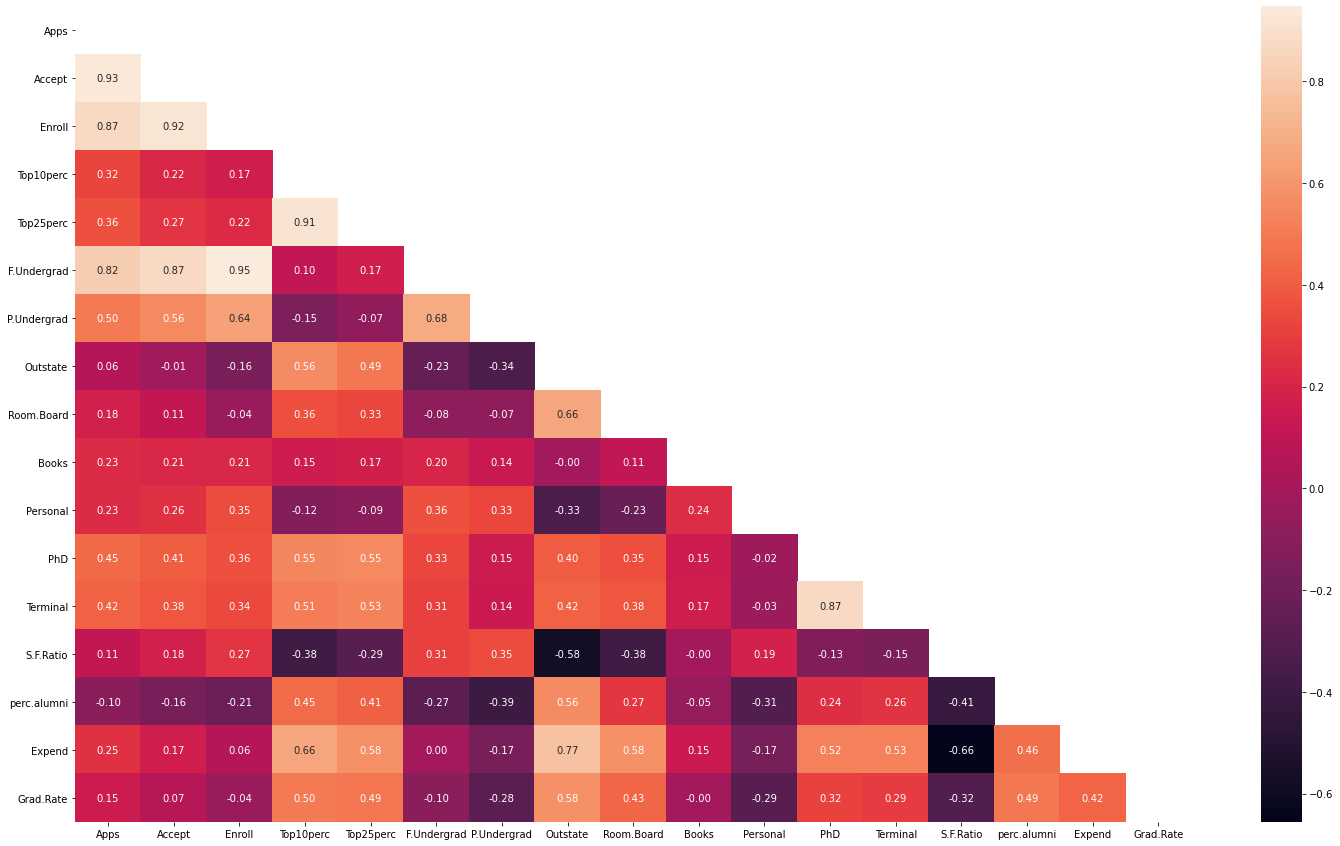

In [46]:
mask = np.triu(np.ones_like(corr1, dtype=np.bool)) 
fig = plt.subplots(figsize=(25, 15))
sns.heatmap(std_df_scaled.corr(), annot=True,fmt='.2f',mask=mask)
plt.show()

In [47]:
cov_matrix = np.cov(std_df_scaled, rowvar=False)
cov_matrix

array([[ 1.00128866e+00,  9.34924522e-01,  8.71047851e-01,
         3.24267498e-01,  3.62868715e-01,  8.17850066e-01,
         5.01757457e-01,  6.32865674e-02,  1.82959147e-01,
         2.33291015e-01,  2.29533091e-01,  4.46769909e-01,
         4.17266656e-01,  1.14213807e-01, -1.00610235e-01,
         2.54533823e-01,  1.47156965e-01],
       [ 9.34924522e-01,  1.00128866e+00,  9.22355696e-01,
         2.20622220e-01,  2.68343861e-01,  8.71549611e-01,
         5.56937826e-01, -1.42554840e-02,  1.10325234e-01,
         2.13905650e-01,  2.56349672e-01,  4.07561902e-01,
         3.84055661e-01,  1.82533467e-01, -1.62609751e-01,
         1.66268254e-01,  6.95416281e-02],
       [ 8.71047851e-01,  9.22355696e-01,  1.00128866e+00,
         1.67564256e-01,  2.24859762e-01,  9.48490114e-01,
         6.42498582e-01, -1.60758239e-01, -3.72502918e-02,
         2.13398113e-01,  3.47533881e-01,  3.61278980e-01,
         3.36082067e-01,  2.67904002e-01, -2.13741732e-01,
         5.73414255e-02, -4.0

In [48]:
np.round(std_df_scaled.cov(),2)

Apps  Accept  Enroll  Top10perc  Top25perc  F.Undergrad  \
Apps         1.00    0.93    0.87       0.32       0.36         0.82   
Accept       0.93    1.00    0.92       0.22       0.27         0.87   
Enroll       0.87    0.92    1.00       0.17       0.22         0.95   
Top10perc    0.32    0.22    0.17       1.00       0.91         0.10   
Top25perc    0.36    0.27    0.22       0.91       1.00         0.17   
F.Undergrad  0.82    0.87    0.95       0.10       0.17         1.00   
P.Undergrad  0.50    0.56    0.64      -0.15      -0.07         0.68   
Outstate     0.06   -0.01   -0.16       0.56       0.49        -0.23   
Room.Board   0.18    0.11   -0.04       0.36       0.33        -0.08   
Books        0.23    0.21    0.21       0.15       0.17         0.20   
Personal     0.23    0.26    0.35      -0.12      -0.09         0.36   
PhD          0.45    0.41    0.36       0.55       0.56         0.33   
Terminal     0.42    0.38    0.34       0.51       0.53         0.31   
S.F.Ratio    0.11    0.18    0.27      -0.38      -0.29         0.31   
perc.alumni -0.10   -0.16   -0.21       0.45       0.41        -0.27   
Expend       0.25    0.17    0.06       0.66       0.58         0.00   
Grad.Rate    0.15    0.07   -0.04       0.50       0.49        -0.10   

             P.Undergrad  Outstate  Room.Board  Books  Personal   PhD  \
Apps                0.50      0.06        0.18   0.23      0.23  0.45   
Accept              0.56     -0.01        0.11   0.21      0.26  0.41   
Enroll              0.64     -0.16       -0.04   0.21      0.35  0.36   
Top10perc          -0.15      0.56        0.36   0.15     -0.12  0.55   
Top25perc          -0.07      0.49        0.33   0.17     -0.09  0.56   
F.Undergrad         0.68     -0.23       -0.08   0.20      0.36  0.33   
P.Undergrad         1.00     -0.34       -0.07   0.14      0.33  0.15   
Outstate           -0.34      1.00        0.66  -0.00     -0.33  0.40   
Room.Board         -0.07      0.66        1.00   0.11     -0.23  0.35   
Books               0.14     -0.00        0.11   1.00      0.24  0.15   
Personal            0.33     -0.33       -0.23   0.24      1.00 -0.02   
PhD                 0.15      0.40        0.35   0.15     -0.02  1.00   
Terminal            0.14      0.42        0.38   0.17     -0.03  0.87   
S.F.Ratio           0.35     -0.58       -0.38  -0.00      0.19 -0.13   
perc.alumni        -0.39      0.56        0.27  -0.05     -0.31  0.24   
Expend             -0.17      0.77        0.58   0.15     -0.17  0.52   
Grad.Rate          -0.28      0.58        0.43  -0.00     -0.29  0.32   

             Terminal  S.F.Ratio  perc.alumni  Expend  Grad.Rate  
Apps             0.42       0.11        -0.10    0.25       0.15  
Accept           0.38       0.18        -0.16    0.17       0.07  
Enroll           0.34       0.27        -0.21    0.06      -0.04  
Top10perc        0.51      -0.38         0.45    0.66       0.50  
Top25perc        0.53      -0.29         0.41    0.58       0.49  
F.Undergrad      0.31       0.31        -0.27    0.00      -0.10  
P.Undergrad      0.14       0.35        -0.39   -0.17      -0.28  
Outstate         0.42      -0.58         0.56    0.77       0.58  
Room.Board       0.38      -0.38         0.27    0.58       0.43  
Books            0.17      -0.00        -0.05    0.15      -0.00  
Personal        -0.03       0.19        -0.31   -0.17      -0.29  
PhD              0.87      -0.13         0.24    0.52       0.32  
Terminal         1.00      -0.15         0.26    0.53       0.29  
S.F.Ratio       -0.15       1.00        -0.41   -0.66      -0.32  
perc.alumni      0.26      -0.41         1.00    0.46       0.49  
Expend           0.53      -0.66         0.46    1.00       0.43  
Grad.Rate        0.29      -0.32         0.49    0.43       1.00

### 2.4	Check the dataset for outliers before and after scaling. What insight do you derive here?

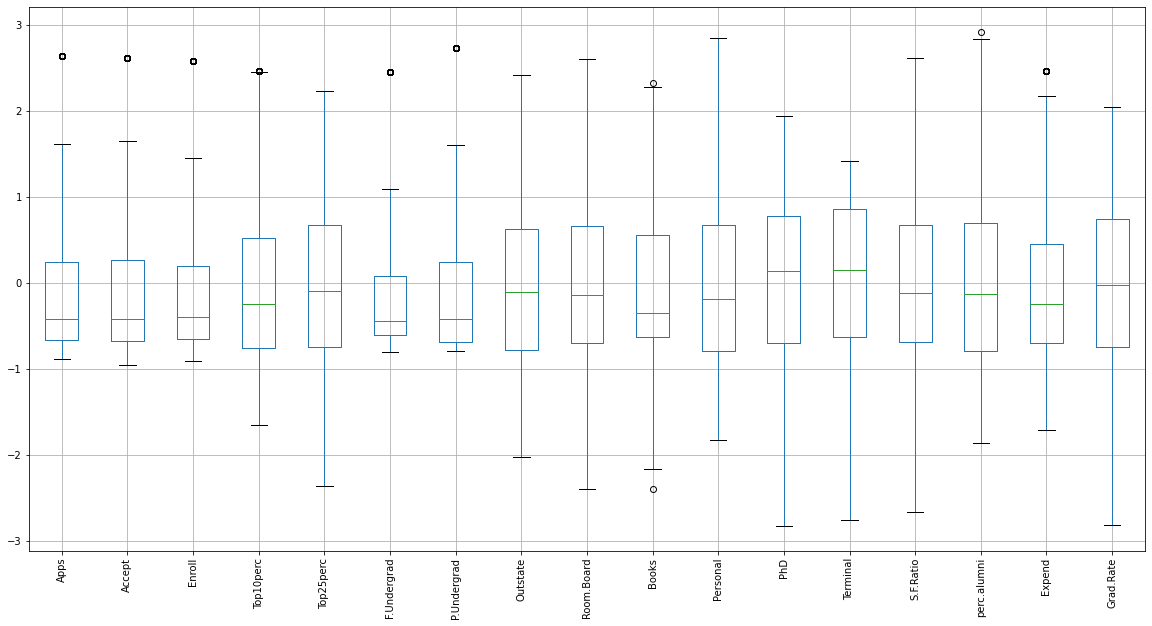

In [49]:
# Scaled Data
std_df_scaled.boxplot(figsize=(20,10))
plt.xticks(rotation=90)
plt.show()

In [50]:
std_df_scaled.describe()

Apps        Accept        Enroll     Top10perc     Top25perc  \
count  7.770000e+02  7.770000e+02  7.770000e+02  7.770000e+02  7.770000e+02   
mean  -1.614164e-16  2.286709e-16 -3.670023e-16  2.413342e-16 -1.546739e-16   
std    1.000644e+00  1.000644e+00  1.000644e+00  1.000644e+00  1.000644e+00   
min   -8.901683e-01 -9.506522e-01 -9.136330e-01 -1.657548e+00 -2.364419e+00   
25%   -6.673020e-01 -6.766475e-01 -6.485096e-01 -7.599482e-01 -7.476067e-01   
50%   -4.165374e-01 -4.160340e-01 -4.025981e-01 -2.470339e-01 -9.077663e-02   
75%    2.459686e-01  2.607371e-01  1.968113e-01  5.223375e-01  6.671042e-01   
max    2.632465e+00  2.606877e+00  2.572675e+00  2.458589e+00  2.233391e+00   

        F.Undergrad   P.Undergrad      Outstate    Room.Board         Books  \
count  7.770000e+02  7.770000e+02  7.770000e+02  7.770000e+02  7.770000e+02   
mean   4.240137e-17 -1.477440e-16  1.963252e-16 -1.331696e-16  5.216048e-16   
std    1.000644e+00  1.000644e+00  1.000644e+00  1.000644e+00  1.000644e+00   
min   -8.024141e-01 -7.913245e-01 -2.018831e+00 -2.393920e+00 -2.393711e+00   
25%   -6.090560e-01 -6.912888e-01 -7.770947e-01 -6.999613e-01 -6.258239e-01   
50%   -4.469797e-01 -4.167227e-01 -1.113444e-01 -1.377944e-01 -3.538412e-01   
75%    7.393108e-02  2.367022e-01  6.204822e-01  6.546466e-01  5.527678e-01   
max    2.447906e+00  2.723335e+00  2.409530e+00  2.594728e+00  2.320655e+00   

           Personal           PhD      Terminal     S.F.Ratio   perc.alumni  \
count  7.770000e+02  7.770000e+02  7.770000e+02  7.770000e+02  7.770000e+02   
mean   8.165926e-17  7.412203e-17 -5.379652e-16 -8.687459e-17  4.422317e-17   
std    1.000644e+00  1.000644e+00  1.000644e+00  1.000644e+00  1.000644e+00   
min   -1.831915e+00 -2.826575e+00 -2.752226e+00 -2.658465e+00 -1.866478e+00   
25%   -7.962281e-01 -7.038746e-01 -6.307465e-01 -6.937737e-01 -7.949635e-01   
50%   -1.920775e-01  1.323407e-01  1.471293e-01 -1.207387e-01 -1.355702e-01   
75%    6.709949e-01  7.755833e-01  8.542891e-01  6.705952e-01  6.886713e-01   
max    2.842485e+00  1.933420e+00  1.420017e+00  2.607999e+00  2.914124e+00   

             Expend     Grad.Rate  
count  7.770000e+02  7.770000e+02  
mean   1.103079e-16  5.509678e-16  
std    1.000644e+00  1.000644e+00  
min   -1.709422e+00 -2.815997e+00  
25%   -7.037841e-01 -7.421026e-01  
50%   -2.451117e-01 -3.105313e-02  
75%    4.468460e-01  7.392505e-01  
max    2.462296e+00  2.042841e+00

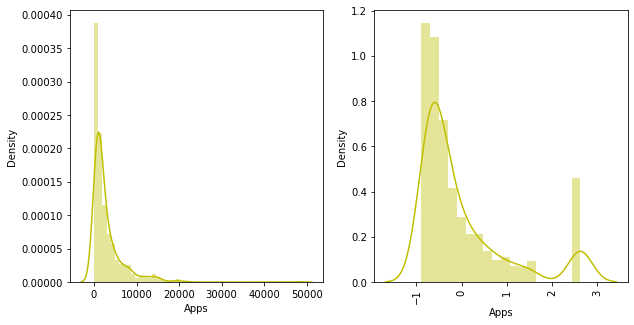

In [51]:
fig,axs = plt.subplots(nrows=1,ncols=2, figsize=(10,5))
sns.distplot(std_df['Apps'], color='y',ax=axs[0])
sns.distplot(std_df_scaled['Apps'], color='y',ax=axs[1])
plt.xticks(rotation=90)
plt.show()

#### Bartletts Test of Sphericity
Bartlett's test of sphericity tests the hypothesis that the variables are uncorrelated in the population.

- H0: All variables in the data are uncorrelated
- Ha: At least one pair of variables in the data are correlated

If the null hypothesis cannot be rejected, then PCA is not advisable.

If the p-value is small, then we can reject the null hypothesis and agree that there is atleast one pair of vairbales in the data wihich are correlated hence PCA is recommended.

In [52]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(std_df_scaled)
p_value

0.0

#### KMO Test

The Kaiser-Meyer-Olkin (KMO) - measure of sampling adequacy (MSA) is an index used to examine how appropriate PCA is.

Generally, if MSA is less than 0.5, PCA is not recommended, since no reduction is expected. On the other hand, MSA > 0.7 is expected to provide a considerable reduction is the dimension and extraction of meaningful components.

In [53]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(std_df_scaled)
kmo_model

0.8561625269639282

In [54]:
from sklearn.decomposition import PCA
pca = PCA(n_components=17, random_state=123)
df_pca = pca.fit_transform(std_df_scaled)


In [55]:
df_pca.transpose() # Component output

array([[-1.73690056, -1.59813592, -1.54279982, ..., -0.67443642,
         6.6604879 , -0.62211979],
       [ 0.78652261, -0.33203965, -1.37926813, ..., -0.14322332,
        -1.08947694,  0.63056961],
       [ 0.09133408,  2.12900893, -0.60248933, ...,  0.37331101,
         1.41458028, -1.31505501],
       ...,
       [ 0.01623   , -0.40401105,  0.08220161, ..., -0.14889688,
        -0.14990609, -0.0080408 ],
       [-0.07985884, -0.13400724, -0.0082802 , ..., -0.24792929,
         1.19141786, -0.11611359],
       [ 0.13601786, -0.12496309, -0.02018226, ..., -0.01308315,
         0.56338956, -0.01123521]])

### 2.6	Perform PCA and export the data of the Principal Component (eigenvectors) into a data frame with the original features

In [56]:
eigen_vec = pca.components_
print("Eigen Vectors : ",eigen_vec)


Eigen Vectors :  [[ 2.42671239e-01  2.08095876e-01  1.64564266e-01  3.44633526e-01
   3.37858398e-01  1.34287678e-01  1.45128920e-02  2.97304568e-01
   2.51192093e-01  9.35681745e-02 -4.84668755e-02  3.24667558e-01
   3.20509921e-01 -1.78476677e-01  1.98617542e-01  3.40157000e-01
   2.48644778e-01]
 [ 3.24930495e-01  3.57755851e-01  3.95824297e-01 -7.53900839e-02
  -3.67211412e-02  4.06243667e-01  3.54916637e-01 -2.37362415e-01
  -1.23789047e-01  1.06015391e-01  2.35469217e-01  7.06517594e-02
   5.96664001e-02  2.47834896e-01 -2.43261851e-01 -1.35747859e-01
  -1.60607758e-01]
 [-9.77100175e-02 -1.25144023e-01 -9.44419384e-02  7.23866450e-02
   4.63368319e-02 -8.72397333e-02 -3.86964803e-02 -2.05908405e-02
   2.60693995e-02  7.13557985e-01  5.21834336e-01 -5.72580979e-02
  -3.74577785e-02 -2.58375559e-01 -1.09906654e-01  1.72929690e-01
  -2.31028150e-01]
 [ 1.02559773e-01  1.21914245e-01  1.42497171e-02 -3.75563233e-01
  -4.27876370e-01  1.46165800e-02  2.07265372e-01  2.53851713e-01
  

In [57]:
df_pca_vec = pd.DataFrame(pca.components_,columns=list(std_df_scaled))
df_pca_vec.shape
df_pca_vec

Apps    Accept    Enroll  Top10perc  Top25perc  F.Undergrad  \
0   0.242671  0.208096  0.164564   0.344634   0.337858     0.134288   
1   0.324930  0.357756  0.395824  -0.075390  -0.036721     0.406244   
2  -0.097710 -0.125144 -0.094442   0.072387   0.046337    -0.087240   
3   0.102560  0.121914  0.014250  -0.375563  -0.427876     0.014617   
4   0.228743  0.202792  0.172168   0.145905   0.120537     0.115073   
5   0.047641  0.033134 -0.038976  -0.083767  -0.021492    -0.054996   
6  -0.012378  0.001415 -0.007928  -0.258268  -0.234717    -0.027916   
7  -0.034103 -0.102522 -0.134762   0.289095   0.336249    -0.122385   
8  -0.184655 -0.189697 -0.052018   0.110852   0.189925     0.000141   
9  -0.134050 -0.123208 -0.047956  -0.071443  -0.045326     0.011266   
10 -0.067941 -0.028689 -0.022975  -0.006573  -0.132078    -0.036376   
11 -0.027399 -0.127528 -0.018056   0.045736  -0.158456     0.078883   
12 -0.476266 -0.208677  0.265982  -0.016249   0.034743     0.520755   
13  0.350002  0.112838 -0.225004  -0.032292   0.026458    -0.350240   
14 -0.025472  0.040814 -0.033748  -0.723554   0.658266     0.010534   
15  0.573869 -0.643625 -0.258382  -0.053190  -0.003703     0.413881   
16  0.151052 -0.452767  0.750068  -0.058995   0.014736    -0.451830   

    P.Undergrad  Outstate  Room.Board     Books  Personal       PhD  Terminal  \
0      0.014513  0.297305    0.251192  0.093568 -0.048467  0.324668  0.320510   
1      0.354917 -0.237362   -0.123789  0.106015  0.235469  0.070652  0.059666   
2     -0.038696 -0.020591    0.026069  0.713558  0.521834 -0.057258 -0.037458   
3      0.207265  0.253852    0.566794 -0.047279 -0.107878 -0.123471 -0.073147   
4     -0.132039  0.042968   -0.090207 -0.016630  0.062935 -0.547357 -0.585124   
5     -0.051645 -0.013967    0.257757  0.608724 -0.384138 -0.062174 -0.047922   
6     -0.093659  0.104399    0.125975 -0.139286  0.656949  0.096114  0.098447   
7      0.054191  0.023889    0.355686 -0.256097  0.251642 -0.047057 -0.116058   
8      0.736103  0.014611    0.217093 -0.016293  0.032822 -0.167560 -0.129240   
9      0.423776 -0.187206   -0.304567  0.074595 -0.092150  0.125222  0.075285   
10     0.189392  0.609931   -0.462002  0.051438  0.017551 -0.036141 -0.104786   
11    -0.035860 -0.557302    0.105909 -0.048590 -0.009335  0.186806 -0.264231   
12    -0.161438  0.007532    0.088839 -0.009112 -0.023451 -0.434191  0.367221   
13     0.101786 -0.223348   -0.091070 -0.042364  0.029468 -0.533329  0.522451   
14    -0.038264 -0.002551   -0.033452 -0.008280 -0.001347  0.056657 -0.089005   
15    -0.032499  0.095191   -0.022449  0.002769 -0.010841  0.005145 -0.001062   
16    -0.004973  0.004740    0.017986 -0.002618 -0.018067 -0.000332  0.015286   

    S.F.Ratio  perc.alumni    Expend  Grad.Rate  
0   -0.178477     0.198618  0.340157   0.248645  
1    0.247835    -0.243262 -0.135748  -0.160608  
2   -0.258376    -0.109907  0.172930  -0.231028  
3   -0.283024    -0.229944  0.220176  -0.074147  
4   -0.226759     0.138310  0.028307   0.287880  
5    0.442094    -0.005596 -0.238206   0.372585  
6    0.174587     0.321858 -0.150524   0.463708  
7    0.215538    -0.635277 -0.086414   0.162586  
8    0.121020     0.457695 -0.050535  -0.129825  
9   -0.458497    -0.250493 -0.065288   0.580722  
10   0.383414    -0.169270  0.396899   0.073914  
11   0.233517     0.058451  0.664010   0.141881  
12   0.044001    -0.069753  0.117934   0.086571  
13   0.086158     0.011708  0.225353   0.052797  
14   0.008573    -0.008853  0.159987  -0.007184  
15  -0.014941     0.003686 -0.064634  -0.018177  
16  -0.001267    -0.026380  0.009781   0.002276

### 2.5	Extract the eigenvalues and eigenvectors. [Using Sklearn PCA Print Both]

In [58]:
var_exp = pca.explained_variance_ratio_
print("Eigen Values : ", var_exp)

Eigen Values :  [0.33151857 0.28373652 0.06464061 0.05855307 0.05274046 0.04497099
 0.03449059 0.03257588 0.02603662 0.02245497 0.01443066 0.00862682
 0.00799196 0.00727087 0.00438662 0.0032887  0.00228608]


In [59]:
#Create a dataframe containing the loadings or coefficients of all PCs
df_extracted_loadings = pd.DataFrame(pca.components_.T, 
                                     columns = ['PC1','PC2', 'PC3', 'PC4', 'PC5', 'PC6',
                                               'PC7','PC8','PC9','PC10','PC11','PC12','PC13',
                                                'PC14','PC15','PC16','PC17'],
                                    index = std_df_scaled.columns)

In [60]:
df_extracted_loadings

PC1       PC2       PC3       PC4       PC5       PC6  \
Apps         0.242671  0.324930 -0.097710  0.102560  0.228743  0.047641   
Accept       0.208096  0.357756 -0.125144  0.121914  0.202792  0.033134   
Enroll       0.164564  0.395824 -0.094442  0.014250  0.172168 -0.038976   
Top10perc    0.344634 -0.075390  0.072387 -0.375563  0.145905 -0.083767   
Top25perc    0.337858 -0.036721  0.046337 -0.427876  0.120537 -0.021492   
F.Undergrad  0.134288  0.406244 -0.087240  0.014617  0.115073 -0.054996   
P.Undergrad  0.014513  0.354917 -0.038696  0.207265 -0.132039 -0.051645   
Outstate     0.297305 -0.237362 -0.020591  0.253852  0.042968 -0.013967   
Room.Board   0.251192 -0.123789  0.026069  0.566794 -0.090207  0.257757   
Books        0.093568  0.106015  0.713558 -0.047279 -0.016630  0.608724   
Personal    -0.048467  0.235469  0.521834 -0.107878  0.062935 -0.384138   
PhD          0.324668  0.070652 -0.057258 -0.123471 -0.547357 -0.062174   
Terminal     0.320510  0.059666 -0.037458 -0.073147 -0.585124 -0.047922   
S.F.Ratio   -0.178477  0.247835 -0.258376 -0.283024 -0.226759  0.442094   
perc.alumni  0.198618 -0.243262 -0.109907 -0.229944  0.138310 -0.005596   
Expend       0.340157 -0.135748  0.172930  0.220176  0.028307 -0.238206   
Grad.Rate    0.248645 -0.160608 -0.231028 -0.074147  0.287880  0.372585   

                  PC7       PC8       PC9      PC10      PC11      PC12  \
Apps        -0.012378 -0.034103 -0.184655 -0.134050 -0.067941 -0.027399   
Accept       0.001415 -0.102522 -0.189697 -0.123208 -0.028689 -0.127528   
Enroll      -0.007928 -0.134762 -0.052018 -0.047956 -0.022975 -0.018056   
Top10perc   -0.258268  0.289095  0.110852 -0.071443 -0.006573  0.045736   
Top25perc   -0.234717  0.336249  0.189925 -0.045326 -0.132078 -0.158456   
F.Undergrad -0.027916 -0.122385  0.000141  0.011266 -0.036376  0.078883   
P.Undergrad -0.093659  0.054191  0.736103  0.423776  0.189392 -0.035860   
Outstate     0.104399  0.023889  0.014611 -0.187206  0.609931 -0.557302   
Room.Board   0.125975  0.355686  0.217093 -0.304567 -0.462002  0.105909   
Books       -0.139286 -0.256097 -0.016293  0.074595  0.051438 -0.048590   
Personal     0.656949  0.251642  0.032822 -0.092150  0.017551 -0.009335   
PhD          0.096114 -0.047057 -0.167560  0.125222 -0.036141  0.186806   
Terminal     0.098447 -0.116058 -0.129240  0.075285 -0.104786 -0.264231   
S.F.Ratio    0.174587  0.215538  0.121020 -0.458497  0.383414  0.233517   
perc.alumni  0.321858 -0.635277  0.457695 -0.250493 -0.169270  0.058451   
Expend      -0.150524 -0.086414 -0.050535 -0.065288  0.396899  0.664010   
Grad.Rate    0.463708  0.162586 -0.129825  0.580722  0.073914  0.141881   

                 PC13      PC14      PC15      PC16      PC17  
Apps        -0.476266  0.350002 -0.025472  0.573869  0.151052  
Accept      -0.208677  0.112838  0.040814 -0.643625 -0.452767  
Enroll       0.265982 -0.225004 -0.033748 -0.258382  0.750068  
Top10perc   -0.016249 -0.032292 -0.723554 -0.053190 -0.058995  
Top25perc    0.034743  0.026458  0.658266 -0.003703  0.014736  
F.Undergrad  0.520755 -0.350240  0.010534  0.413881 -0.451830  
P.Undergrad -0.161438  0.101786 -0.038264 -0.032499 -0.004973  
Outstate     0.007532 -0.223348 -0.002551  0.095191  0.004740  
Room.Board   0.088839 -0.091070 -0.033452 -0.022449  0.017986  
Books       -0.009112 -0.042364 -0.008280  0.002769 -0.002618  
Personal    -0.023451  0.029468 -0.001347 -0.010841 -0.018067  
PhD         -0.434191 -0.533329  0.056657  0.005145 -0.000332  
Terminal     0.367221  0.522451 -0.089005 -0.001062  0.015286  
S.F.Ratio    0.044001  0.086158  0.008573 -0.014941 -0.001267  
perc.alumni -0.069753  0.011708 -0.008853  0.003686 -0.026380  
Expend       0.117934  0.225353  0.159987 -0.064634  0.009781  
Grad.Rate    0.086571  0.052797 -0.007184 -0.018177  0.002276

### 2.7	Write down the explicit form of the first PC (in terms of the eigenvectors. Use values with two places of decimals only). [hint: write the linear equation of PC in terms of eigenvectors and corresponding features]

PC1 = 0.24*Apps + 0.21*Accept + 0.16*Enroll + 0.34*Top10perc + 0.34*Top25perc 
                   + 0.13*F.Undergrad + 0.01* P.Undergrad + 0.30* Outstate + 0.25*Room.Board
                   +0.09*Books + -0.05*Personal + 0.32*PhD + 0.32*Terminal + -0.18* S.F.Ratio 
                   +0.20*perc.alumni + 0.34*Expend + 0.25*Grad.Rate


### 2.8	Consider the cumulative values of the eigenvalues. How does it help you to decide on the optimum number of principal components? What do the eigenvectors indicate?

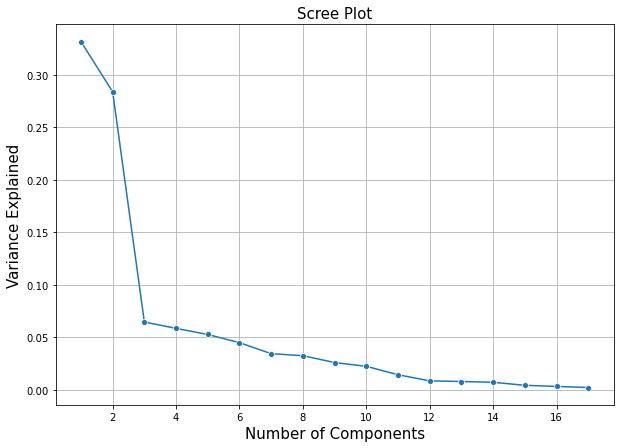

In [61]:
plt.figure(figsize=(10,7))
sns.lineplot(y=var_exp,x=range(1,len(var_exp)+1),marker='o')
plt.xlabel('Number of Components',fontsize=15)
plt.ylabel('Variance Explained',fontsize=15)
plt.title('Scree Plot',fontsize=15)
plt.grid()
plt.show()

In [62]:
#Check the cumlative explained variance ratio to find a cut off for selecting the number of PCs
np.cumsum(pca.explained_variance_ratio_)

array([0.33151857, 0.61525509, 0.6798957 , 0.73844877, 0.79118924,
       0.83616023, 0.87065082, 0.9032267 , 0.92926332, 0.95171829,
       0.96614894, 0.97477576, 0.98276773, 0.9900386 , 0.99442522,
       0.99771392, 1.        ])

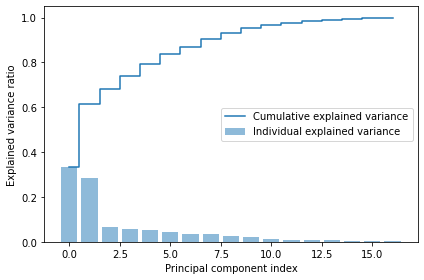

In [63]:
plt.bar(range(0,len(pca.explained_variance_ratio_)), pca.explained_variance_ratio_, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(np.cumsum(pca.explained_variance_ratio_))), np.cumsum(pca.explained_variance_ratio_), where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [64]:
df_selected = df_extracted_loadings[['PC1','PC2', 'PC3', 'PC4', 'PC5','PC6','PC7','PC8']]

In [65]:
df_selected

PC1       PC2       PC3       PC4       PC5       PC6  \
Apps         0.242671  0.324930 -0.097710  0.102560  0.228743  0.047641   
Accept       0.208096  0.357756 -0.125144  0.121914  0.202792  0.033134   
Enroll       0.164564  0.395824 -0.094442  0.014250  0.172168 -0.038976   
Top10perc    0.344634 -0.075390  0.072387 -0.375563  0.145905 -0.083767   
Top25perc    0.337858 -0.036721  0.046337 -0.427876  0.120537 -0.021492   
F.Undergrad  0.134288  0.406244 -0.087240  0.014617  0.115073 -0.054996   
P.Undergrad  0.014513  0.354917 -0.038696  0.207265 -0.132039 -0.051645   
Outstate     0.297305 -0.237362 -0.020591  0.253852  0.042968 -0.013967   
Room.Board   0.251192 -0.123789  0.026069  0.566794 -0.090207  0.257757   
Books        0.093568  0.106015  0.713558 -0.047279 -0.016630  0.608724   
Personal    -0.048467  0.235469  0.521834 -0.107878  0.062935 -0.384138   
PhD          0.324668  0.070652 -0.057258 -0.123471 -0.547357 -0.062174   
Terminal     0.320510  0.059666 -0.037458 -0.073147 -0.585124 -0.047922   
S.F.Ratio   -0.178477  0.247835 -0.258376 -0.283024 -0.226759  0.442094   
perc.alumni  0.198618 -0.243262 -0.109907 -0.229944  0.138310 -0.005596   
Expend       0.340157 -0.135748  0.172930  0.220176  0.028307 -0.238206   
Grad.Rate    0.248645 -0.160608 -0.231028 -0.074147  0.287880  0.372585   

                  PC7       PC8  
Apps        -0.012378 -0.034103  
Accept       0.001415 -0.102522  
Enroll      -0.007928 -0.134762  
Top10perc   -0.258268  0.289095  
Top25perc   -0.234717  0.336249  
F.Undergrad -0.027916 -0.122385  
P.Undergrad -0.093659  0.054191  
Outstate     0.104399  0.023889  
Room.Board   0.125975  0.355686  
Books       -0.139286 -0.256097  
Personal     0.656949  0.251642  
PhD          0.096114 -0.047057  
Terminal     0.098447 -0.116058  
S.F.Ratio    0.174587  0.215538  
perc.alumni  0.321858 -0.635277  
Expend      -0.150524 -0.086414  
Grad.Rate    0.463708  0.162586

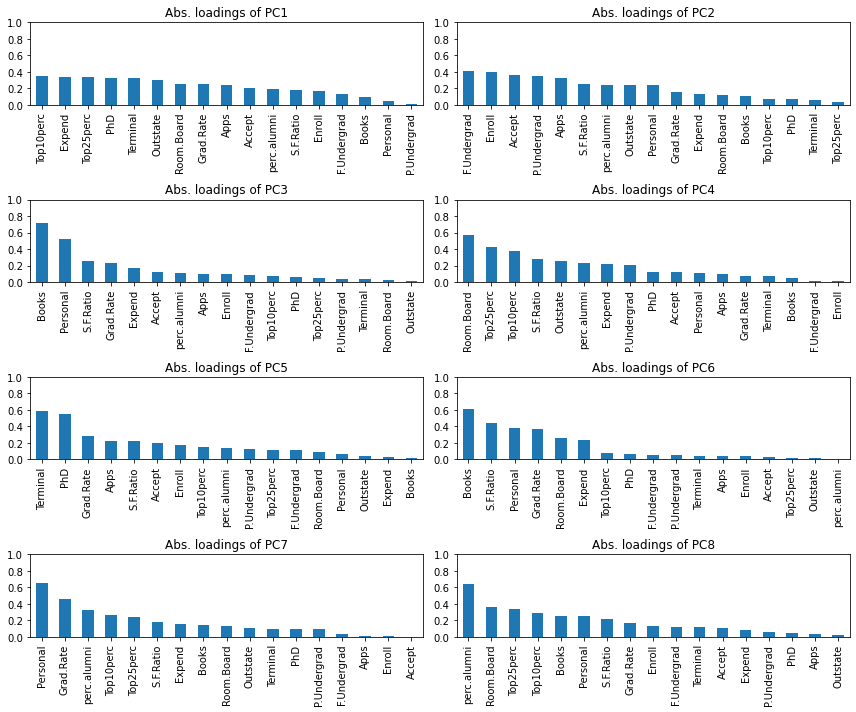

In [66]:
plt.figure(figsize = (12,10))
for i in range(len(df_selected.columns)):
    plt.subplot(4,2,i+1)
    abs(df_selected[df_selected.columns[i]]).T.sort_values(ascending = False).plot.bar()
    plt.yticks(np.arange(0,1.2,.2))
    plt.title('Abs. loadings of {}'.format(df_selected.columns[i]))
    plt.tight_layout()

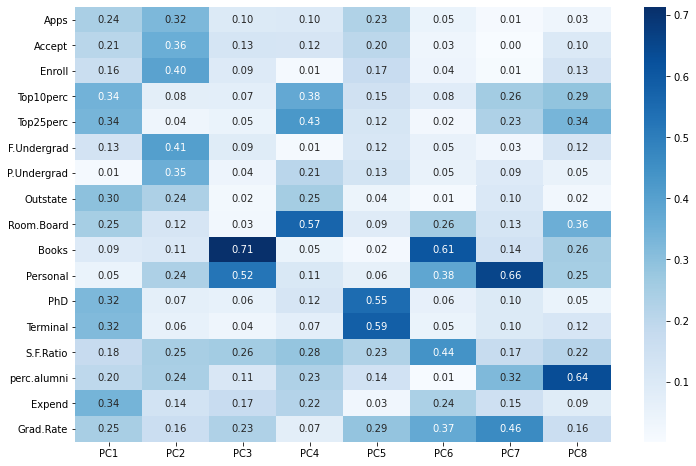

In [67]:
#Compare how the original features influence various PCs
plt.figure(figsize = (12,8))
sns.heatmap(abs(df_selected), annot = True, cmap = 'Blues',fmt = '.2f');

In [68]:
pca = PCA(n_components=8, random_state=123)
pca_final = pca.fit_transform(std_df_scaled)

In [69]:
pca_final_df = pd.DataFrame(pca_final, columns = df_selected.columns)
pca_final_df.head(10)

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -1.736901  0.786523  0.091334 -1.018149 -0.351402 -0.765610  0.879426   
1 -1.598136 -0.332040  2.129009  2.898618  1.927792  1.364933 -0.337346   
2 -1.542800 -1.379268 -0.602489  0.005509  0.955652 -0.965602 -0.174358   
3  3.181988 -2.993983  0.335530 -0.456311 -0.915076 -1.753031 -1.261560   
4 -1.785881 -0.202226  2.731233  0.689054 -1.194913  0.174538 -1.369389   
5 -0.549618 -1.823884  0.164431 -0.211133  0.244816 -0.839955 -1.791114   
6  0.232046 -1.661746  0.276293  0.957245 -1.712301 -0.370756  0.988602   
7  1.904425 -1.642138 -0.988320 -0.497628 -1.039238 -0.255906  0.226435   
8  0.797788 -2.344255 -1.933846  0.354534 -0.240210 -0.984291 -0.302141   
9 -2.837048 -1.026997  2.106879  0.260420  2.173966 -0.123553 -0.535384   

        PC8  
0  0.976811  
1  0.219223  
2 -0.332625  
3  0.241643  
4  0.101444  
5  0.352368  
6  0.062343  
7 -0.304651  
8  0.497219  
9  0.088376

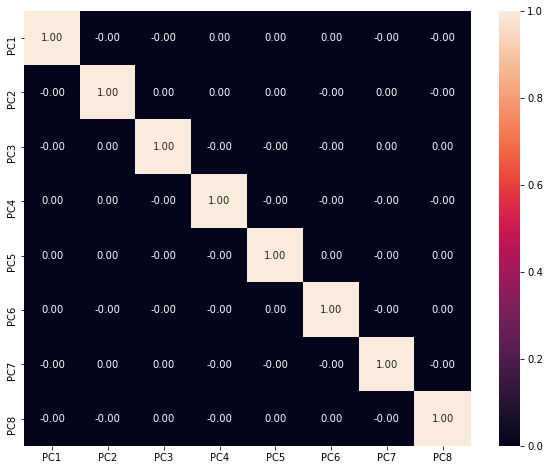

In [70]:
plt.figure(figsize = (10,8))
sns.heatmap(pca_final_df.corr(), annot=True,fmt='.2f');

### 2.9	Explain the business implication of using the Principal Component Analysis for this case study. How may PCs help in the further analysis? [Hint: Write Interpretations of the Principal Components Obtained]



In [71]:
from matplotlib.patches import Rectangle

In [72]:
pca.components_

array([[ 0.24267124,  0.20809588,  0.16456427,  0.34463353,  0.3378584 ,
         0.13428768,  0.01451289,  0.29730457,  0.25119209,  0.09356817,
        -0.04846688,  0.32466756,  0.32050992, -0.17847668,  0.19861754,
         0.340157  ,  0.24864478],
       [ 0.3249305 ,  0.35775585,  0.3958243 , -0.07539008, -0.03672114,
         0.40624367,  0.35491664, -0.23736241, -0.12378905,  0.10601539,
         0.23546922,  0.07065176,  0.0596664 ,  0.2478349 , -0.24326185,
        -0.13574786, -0.16060776],
       [-0.09771002, -0.12514402, -0.09444194,  0.07238665,  0.04633683,
        -0.08723973, -0.03869648, -0.02059084,  0.0260694 ,  0.71355799,
         0.52183434, -0.0572581 , -0.03745778, -0.25837556, -0.10990665,
         0.17292969, -0.23102815],
       [ 0.10255977,  0.12191424,  0.01424972, -0.37556323, -0.42787637,
         0.01461658,  0.20726537,  0.25385171,  0.56679378, -0.04727896,
        -0.10787843, -0.12347098, -0.07314694, -0.28302404, -0.22994443,
         0.22017626

In [73]:
df_pca_loading = pd.DataFrame(pca.components_,columns=list(std_df_scaled))
df_pca_loading.shape
df_pca_loading

Apps    Accept    Enroll  Top10perc  Top25perc  F.Undergrad  \
0  0.242671  0.208096  0.164564   0.344634   0.337858     0.134288   
1  0.324930  0.357756  0.395824  -0.075390  -0.036721     0.406244   
2 -0.097710 -0.125144 -0.094442   0.072387   0.046337    -0.087240   
3  0.102560  0.121914  0.014250  -0.375563  -0.427876     0.014617   
4  0.228743  0.202792  0.172168   0.145905   0.120537     0.115073   
5  0.047641  0.033134 -0.038976  -0.083767  -0.021492    -0.054996   
6 -0.012378  0.001415 -0.007928  -0.258268  -0.234717    -0.027916   
7 -0.034103 -0.102522 -0.134762   0.289095   0.336249    -0.122385   

   P.Undergrad  Outstate  Room.Board     Books  Personal       PhD  Terminal  \
0     0.014513  0.297305    0.251192  0.093568 -0.048467  0.324668  0.320510   
1     0.354917 -0.237362   -0.123789  0.106015  0.235469  0.070652  0.059666   
2    -0.038696 -0.020591    0.026069  0.713558  0.521834 -0.057258 -0.037458   
3     0.207265  0.253852    0.566794 -0.047279 -0.107878 -0.123471 -0.073147   
4    -0.132039  0.042968   -0.090207 -0.016630  0.062935 -0.547357 -0.585124   
5    -0.051645 -0.013967    0.257757  0.608724 -0.384138 -0.062174 -0.047922   
6    -0.093659  0.104399    0.125975 -0.139286  0.656949  0.096114  0.098447   
7     0.054191  0.023889    0.355686 -0.256097  0.251642 -0.047057 -0.116058   

   S.F.Ratio  perc.alumni    Expend  Grad.Rate  
0  -0.178477     0.198618  0.340157   0.248645  
1   0.247835    -0.243262 -0.135748  -0.160608  
2  -0.258376    -0.109907  0.172930  -0.231028  
3  -0.283024    -0.229944  0.220176  -0.074147  
4  -0.226759     0.138310  0.028307   0.287880  
5   0.442094    -0.005596 -0.238206   0.372585  
6   0.174587     0.321858 -0.150524   0.463708  
7   0.215538    -0.635277 -0.086414   0.162586

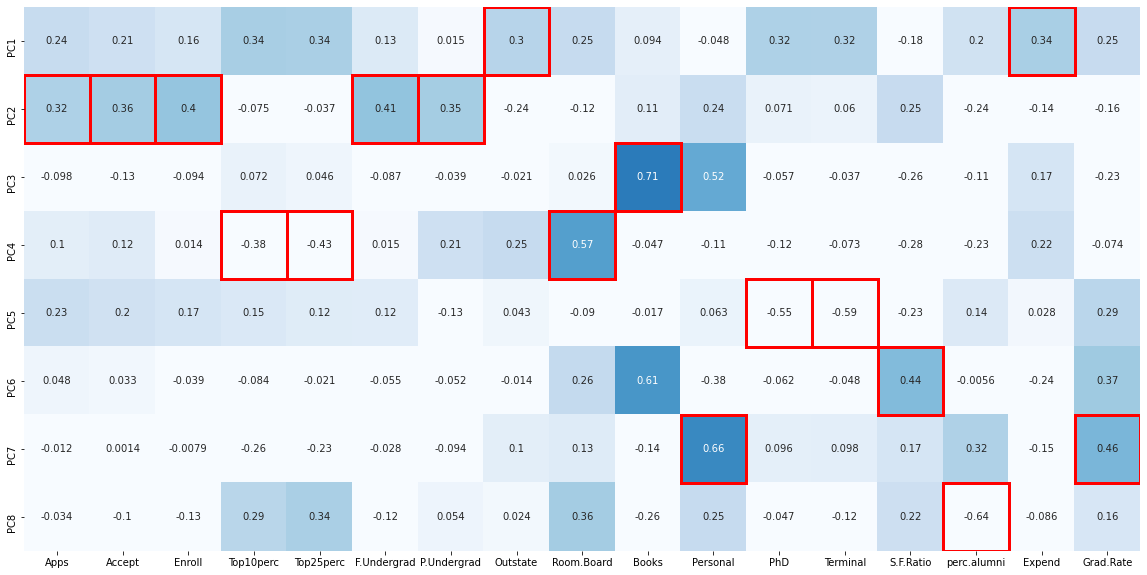

In [74]:
fig,ax = plt.subplots(figsize=(20, 10), facecolor='w', edgecolor='k')
ax = sns.heatmap(df_pca_loading, annot=True, vmax=1.0, vmin=0, cmap='Blues', cbar=False, fmt='.2g', ax=ax,
                 yticklabels=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8'])

column_max = df_pca_loading.abs().idxmax(axis=0)

for col, variable in enumerate(df_pca_loading.columns):
    position = df_pca_loading.index.get_loc(column_max[variable])
    ax.add_patch(Rectangle((col, position),1,1, fill=False, edgecolor='red', lw=3))

# END